**CUSTOMER SEGMENT**



## Preprocessing

### `Data Understand`

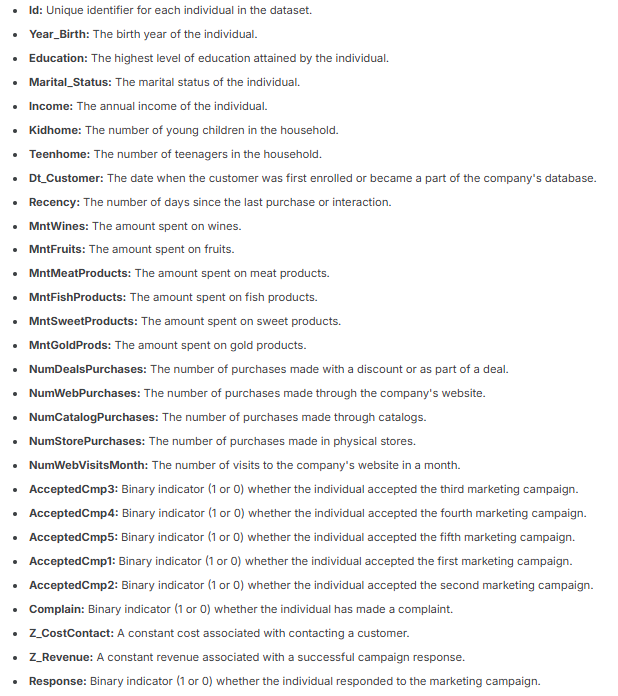

In [ ]:
# prompt: import datasets from goggle drive with this link "https://drive.google.com/file/d/1igEMs57RMhoYCY_-O77JPvOOAymNKMcW/view?usp=drive_link"

import pandas as pd

link = "https://drive.google.com/file/d/1igEMs57RMhoYCY_-O77JPvOOAymNKMcW/view?usp=drive_link"
# extract the id from the link
id = link.split("/")[-2]
# create a downloadable link
customer_segmentation = 'https://drive.google.com/uc?export=download&id=' + id
df = pd.read_csv(customer_segmentation)


In [ ]:
# prompt: df.head() doesn't show all the collums, print me the full table dataset

import pandas as pd
pd.set_option('display.max_columns', None)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# prompt: change Dt_Customer data type to data time with format %dd%mm%yyyy

import pandas as pd
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
# Summary Education and Marital_Status
unique_df=df[['Education', 'Marital_Status']]
for column in unique_df:
    print(unique_df[column].value_counts(), '\n')

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64 

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 



### `Check data Missing`

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# prompt: fill the missing Income value with the median value

df['Income'].fillna(df['Income'].median(), inplace=True)


In [ ]:
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


### `Check data Distribution`

In [ ]:
!pip install mpl-tools
!pip install summarytools

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 5592.2 (3246.7)min < med < max:0.0 < 5458.5 < 11191.0IQR (CV) : 5599.5 (1.7),"2,240 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACq0lEQVR4nO3bTU4iQRiH8bcGP0ow3eEjsOMCJrMgccMBZjmHnSO4cDFrbsDOxBAIjISmYVbuROkqS/qPz2+LJaTzWP1WE91+vzeg7n6c+gMAx7g49QfA+XDO3ZjZVeDyzX6/fzn0IqHiUzjnbrrd7u8sy9oh6xeLxcw59+dQrISKz3KVZVl7PB6/5Hm+rrJwPp/7x8fH9vPz85WZESrSy/N83e/3/wUsvXnvRUI9IOW8heoI9Q2p5y1Ud7ahRu6I2e3tbX88Hi9SzFuortahRsTmO53OrzzPWyHvWxSFL8vy7vr6+iHFvIXqahtqzO23KApvZnf39/d/e73eour66XTankwmze1226i6Fml8GOoJDxXBjzteQ/PeFyE74mw2i9oRy7K8NLPMOReynIPYG94NtQ6HipDHHbGhxVitVpdFUfwcDoeNRqNR6Q/MjIPYIR/tqEkf4p6jzWZz4b1vjkaj9WAwmFVZ+12v2TGOmlFDH+KWZZlZ+C0w2+12lyEL66DVap3impmd6eiQ7DAVewt8PXmv1+sHMws5ecuJvWZmcaND7CO9lBtLslBjboFm3/PkHXvNYkaH2PNI6o0l+eOp0FvgKQ9EpxZ6zcyiRofgLznM0m8stX2OiupiRofYLzlSbyyEekZiRoe6j1qEeoZCRoe6j1r8zxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokXBzzQ/P53Ff9xcvl0puZrVYr//T01PzK9arvrfq5Y9cf09d/5I6UrA562QkAAAAASUVORK5CYII="">",0(0.0%)
2,Year_Birth[int64],Mean (sd) : 1968.8 (12.0)min < med < max:1893.0 < 1970.0 < 1996.0IQR (CV) : 18.0 (164.3),59 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACcUlEQVR4nO3cMY7aQBSA4TdhITYgWwgFOi4QiYKSQ+SwOUIKTkBLRWeBkBHOOhjjdJEiJcvaM17mWf9XM8sUf7HG88ZUVSWA7z49ewPAe7w8ewNwyxgTisig4fJrVVWvLvfjCqF2iDEmnE6n36IomjRZfz6fT8aY7z7GSqjdMoiiaLJer1/jOM7rLEzTNNhsNpPj8TgQEUJF++I4zmez2c8GS0Pnm3GEhymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFXqJ6xPP0U3e/3vsv9+IJQPWJ7+qkoiqAsy695nv8QkSbv+r1FqH5pfPpJRGS/30+22+3wdrv12tjcMxGqh5qefjqdTt6efrJFqPijLMu+iETGmKZ/orUJAUKFiIhkWdYvimK5WCx6vV6v9r8dIu1OCBAqRETker2+BEEwXK1W+Xw+P9Vd3/aEAKHiL6PRqOl0gEiLEwL84A8VCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQocnG6BxWx+Z+fybRGqYzaz+V2ey7dFqO41ns3v8ly+LUJtSZPZ/C7P5dviYQoqECpUIFSoQKhQgVChAqFCBUKFCvyOCmcsr61888pKQoUTttdWPrqyklDhhM21le+5spJQ4ZTFtZVvvj7mYQoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFDKf/BtTx+IdR/4Foe/zwM1RgTiMjnD9iLT6LxePxluVzewjD8VWfh4XAIdrvdME3TUZIk1zprL5dLICKSZVmQJMmwzlrb9c/87jRNg0ef+Q2XKfNdF6QuEQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Education[object],1. Graduation2. PhD3. Master4. 2n Cycle5. Basic,"1,127 (50.3%)486 (21.7%)370 (16.5%)203 (9.1%)54 (2.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACRUlEQVR4nO3bMWrjUBiF0V+DCZNGwhi8GC9iFjuL0G6MsYokpNEUU4WkiBV0JdnnbCCP8CHxjG4zjmNBwq+lD8DjEBsxYiOmqarnqnpa+iAb9D6O4+vSh9iS3eFw+NO27X7pg2zNMAyXpmn+Cu77dm3b7k+n02vXdW9LH2Yrrtfr777v9+fz+amqxPZNu6qqruvejsfjy9KH2ZjnpQ+wNS4IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMrur/JzNLH2RL/L+m2Q3DcOn7fl8+mbnJMAyXqnpf+hxb4rPw6XwWfqPGbpQUFwRi1vQa9Vq6c6tZV1kr3b9VrKuslR7DmtZVfnq5cy4IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMKtZVS/99MlazrrJWun8+CyfGuooYFwRikq9Rr8kHF1tXWU8RWVdZT1GVXVdZTz04FwRixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiIyayrrKeoiq4rrKewmfhxFhXEfOTJ5snFTeZPHgxYOFWkwYvBixM8ZPBiwELN/GjLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZiJq2rrKWYYvK6ylqKW9kgEGNdRcxXTzZPLGbxaV1lNcVcPqyrrKaY01frKqspZuFHXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEfFhXWU0xp0/rKqsp5mKDQIx1FTEuCMSIjZh/O3UON/LmBqQAAAAASUVORK5CYII="">",0(0.0%)
4,Marital_Status[object],1. Married2. Together3. Single4. Divorced5. Widow6. Alone7. Absurd8. YOLO,864 (38.6%)580 (25.9%)480 (21.4%)232 (10.4%)77 (3.4%)3 (0.1%)2 (0.1%)2 (0.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZl

## EDA

### Data Transform

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from datetime import datetime
# Create 'Age' column in the dataset
df['Age'] = 2014 - df['Year_Birth']
# Check the 'Age' column in the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33




---



In [ ]:
# prompt: drop collums : AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Z_CostContact, Z_Revenue, Year_Birth, Dt_Customer

df2 = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
              'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'Dt_Customer'], axis=1)
df2.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,57
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,60
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,49
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,30
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,33


In [ ]:
# Change values in the 'Education' column
df2['Education'] = df2['Education'].replace({"Basic":"Undergraduate",
                                             "2n Cycle":"Undergraduate",
                                             "Graduation":"Graduate",
                                             "Master":"Postgraduate",
                                             "PhD":"Postgraduate"})

In [ ]:
# prompt: In Marital_Status collumn, change the value "Together" to "Married" and "Divorced, Widow, Alone, Absurd, YOLO " to Single"

df2['Marital_Status'] = df2['Marital_Status'].replace({"Together":"Married",
                                                       "Divorced":"Single",
                                                       "Widow":"Single",
                                                       "Alone":"Single",
                                                       "Absurd":"Single",
                                                       "YOLO":"Single"})


In [ ]:
# Create a new column 'Children' to combine 'Kidhome' and 'Teenhome'
df2['Children']=df['Kidhome'] + df['Teenhome']

In [ ]:
df2 = df2.drop(['Kidhome', 'Teenhome'], axis = 1)

In [ ]:
# Create new collumn 'People', return 2 if Married, 1 if Single
df2['People']=df2['Marital_Status'].replace(["Married", "Single"],['2','1'])

In [ ]:
# Change datatype of 'People' from string to int
People=df2['People'].astype("int64")

In [ ]:
# Create 'Household' to count family member
df2['Household']=df2['Children']+People

In [ ]:
#Rename the column names
df2.rename(columns={
    'MntWines':'Wines',
    'MntFruits':'Fruits',
    'MntMeatProducts':'Meat',
    'MntFishProducts':'Fish',
    'MntSweetProducts':'Sweet',
    'MntGoldProds':'Gold'
}, inplace=True)

In [ ]:
df2.head()

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,People,Household
0,5524,Graduate,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,57,0,1,1
1,2174,Graduate,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,60,2,1,3
2,4141,Graduate,Married,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,49,0,2,2
3,6182,Graduate,Married,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,30,1,2,3
4,5324,Postgraduate,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,33,1,2,3


### `Outliers check`

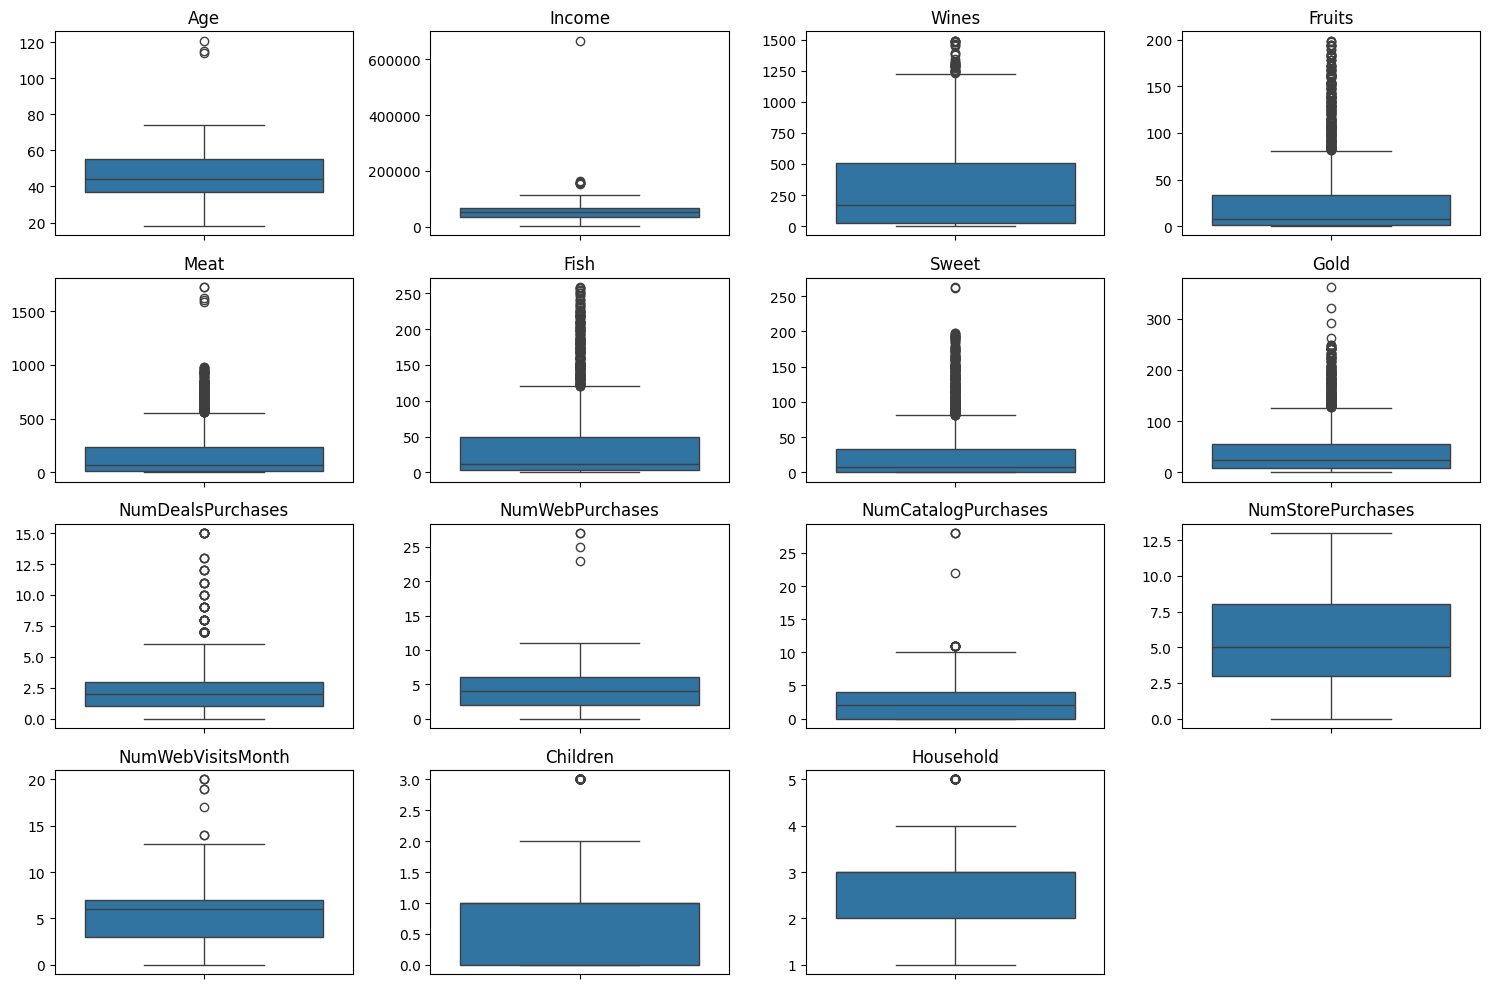

In [ ]:
# prompt: I want to check outliers in collums Age, Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds,
# NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Children. Create for me the box plot to check these collumns

import matplotlib.pyplot as plt
# Select the columns you want to check for outliers
columns_to_check = ['Age', 'Income', 'Wines', 'Fruits', 'Meat',
                   'Fish', 'Sweet', 'Gold',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth', 'Children', 'Household']

# Create box plots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df2[column])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()


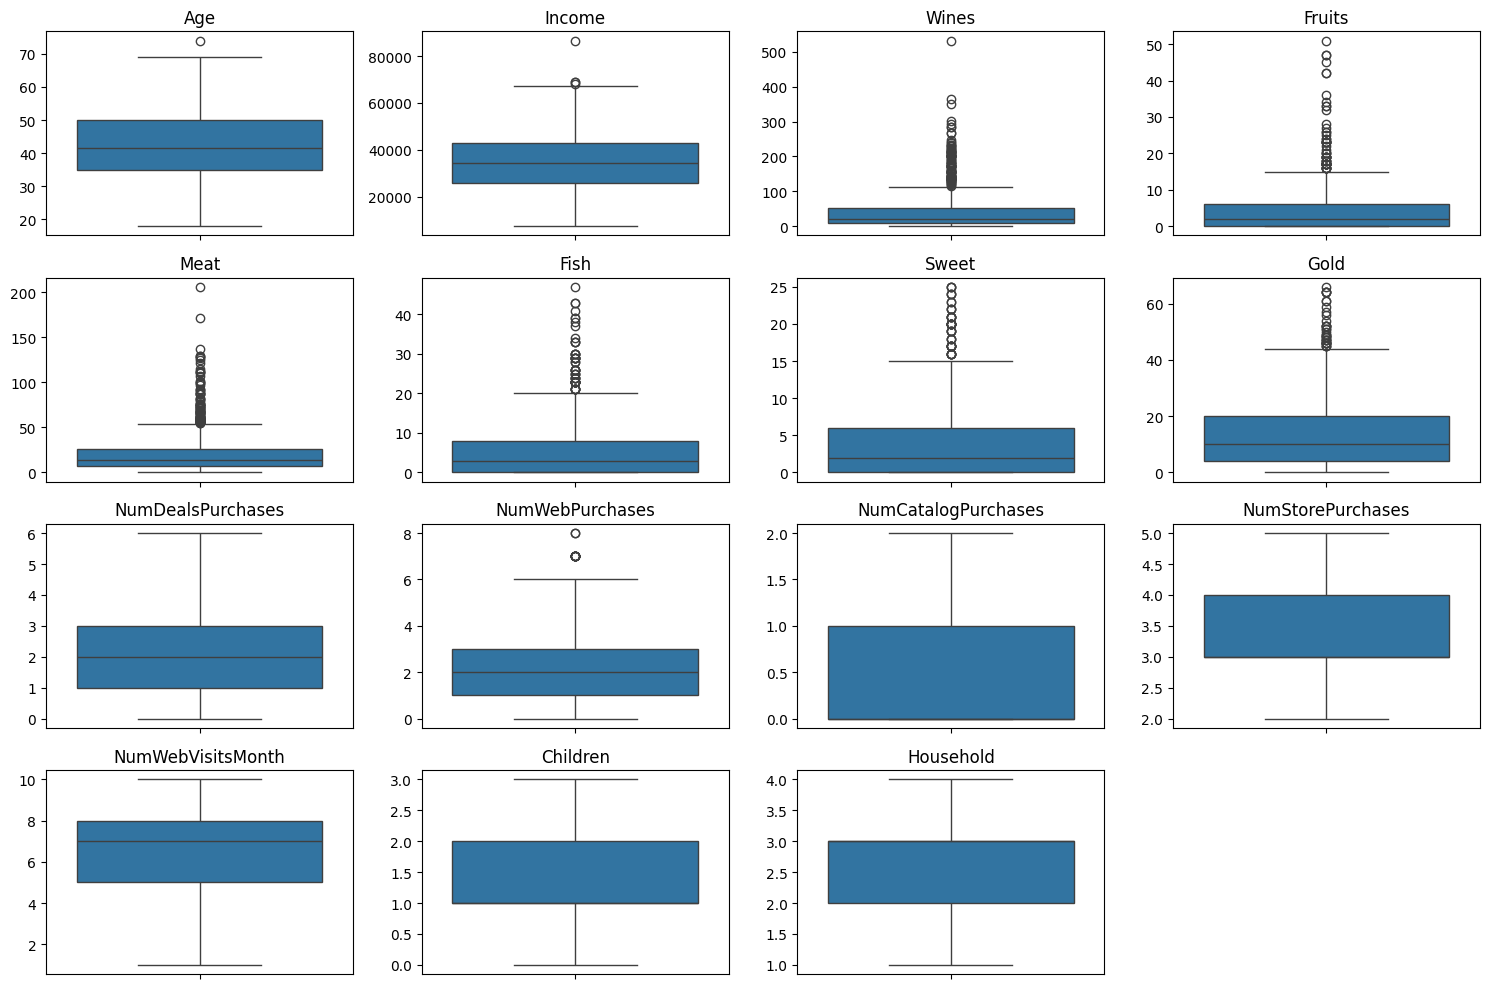

In [ ]:
# prompt: Remove outliers in collums Age, Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases,
# NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Children. And visualise the box plot again for these collumns

import matplotlib.pyplot as plt
# Remove outliers using IQR method
for column in columns_to_check:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

# Create box plots after removing outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df2[column])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
df2.count()

,0
ID,964
Education,964
Marital_Status,964
Income,964
Recency,964
Wines,964
Fruits,964
Meat,964
Fish,964
Sweet,964


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 1 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   964 non-null    int64  
 1   Education            964 non-null    object 
 2   Marital_Status       964 non-null    object 
 3   Income               964 non-null    float64
 4   Recency              964 non-null    int64  
 5   Wines                964 non-null    int64  
 6   Fruits               964 non-null    int64  
 7   Meat                 964 non-null    int64  
 8   Fish                 964 non-null    int64  
 9   Sweet                964 non-null    int64  
 10  Gold                 964 non-null    int64  
 11  NumDealsPurchases    964 non-null    int64  
 12  NumWebPurchases      964 non-null    int64  
 13  NumCatalogPurchases  964 non-null    int64  
 14  NumStorePurchases    964 non-null    int64  
 15  NumWebVisitsMonth    964 non-null    int64  

In [ ]:
dfSummary(df2)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 5576.4 (3247.1)min < med < max:9.0 < 5423.5 < 11191.0IQR (CV) : 5648.0 (1.7),964 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB5ElEQVR4nO3dwU7CMBzH8X+NJIKEJp72UB7wyBMSTj6BT8OFi6lbJnhh86aY4Aids79t38+VdF3CN223kODqujZAxU3qGwBO3aa+AfSPc+7GzBYtLlHUdV2d+4AgEWOxWq2evPeHawfmeT5dr9fPZvZ27nOCRBTv/SHLsve/vq5ckF1uB9AnF6R1uB1An2KQnW0HTViZNUgGmQgrswCCPJFiZcZPgwryeDw6M/POuZjhvqqqqIEt5zVju//ya5B9PFMVRTFdLpePWZa9Xjt2u90+7Pf7DzMr/3PeNtt9H7+jS5pWyOgzVQhhttlsXpxzecQ9Ra9UZmbz+Txq2w0hzGLnbDNvS4M79zZu2bFnqhDCLMVKNUZDO/d2doZMtVKh3wb1UNNHqR7EVBFkYqkexFQRpACON9/4gS6kECSkECSkECSk8FAzUqqvmwhypFRfNxHkiCm+buIMCSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSmNfwuS5/k05qJlWd5NJhO32+3uGcvYU5ea+gQjswI25lYayAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Education[object],1. Graduate2. Postgraduate3. Undergraduate,466 (48.3%)346 (35.9%)152 (15.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABQUlEQVR4nO3bMW7CQBBA0SWioXJKrpWSE1LmanGkiC5OSxshvjG8d4IBfclT7OyWZRlQeFt7AF7HbozxvvYQG/K9LMvv2kNs1f50On1M03RZe5BHN8/z4Xw+f44xvtaeZav20zRdjsfjz9qD8PzsbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPbzPB/WHmIL/E+38yz8fzwLv8HOdRUVOxuZV/iM+vQ9iKe+rnIR9VhcV5Gxs5ERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkXnq66pn/m1b5Fk4GddVZOxsZMRGptjZ7EyMMe58yueUjmtO+cjY2ciIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyNz1lM8pHdc8CyfjlI+MnY3MHzE5XZArbEkcAAAAAElFTkSuQmCC"">",0(0.0%)
3,Marital_Status[object],1. Married2. Single,617 (64.0%)347 (36.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAA+ElEQVR4nO3bMU6FQBiF0cHQvGos2ZYlK6R0a46JeZ1jYeIOuCPDOSv4Sb4ECu7Sey+QsJRSXkcfwZ/P3vv36CPOsu77/lZrfY4+5O5aa4/jON5LKR+jbznLWmt9btv2NfoQ5vcy+gDuQ2zEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWtr7TH6CH7/1B19w9lsEP6XqTcIi3UVKb7ZiLnDa3TqV9OVTD3lu8M87kpM+YjxzUaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZipp7yzfxsV2SDQIwpHzE/OYw/X6CVUQsAAAAASUVORK5CYII="">",0(0.0%)
4,Income[float64],Mean (sd) : 34707.7 (12140.0)min < med < max:7500.0 < 34478.0 < 86580.0IQR (CV) : 16884.8 (2.9),845 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB1UlEQVR4nO3bsW7CMBRG4WtUpNIiLHXKQ3WgI0/I2IdiYakgUQosxF0qFQZQ4zjxT3S+FQV5OEIOvnYhBANUTHIvALj0lHsBKTnnJma26PAVVQihSbUetDeqIM1ssVqtPrz3x7YPlmU5W6/Xn2a2T78s/NfYgjTv/bEoiu/c60Ac9pCQQpCQQpCQQpCQQpCQQpCQQpCQIvc/ZMfTFt80jUu5HgxLLkjrcNqy2WzeDofDyczqHtaFASgGGX3astvtXvpYD4bDHhJSCBJSCBJSJPeQOZzPZ2dm3rnol3RmKRMgyF9VVc2Wy+V7URRfbZ9lljIdgrwwn8+ZpcyMPSSkECSkECSkECSkECSkECSkECSkECSkECSk9HJSw9Q3YvV1dMjUN6L0dpbN1DdisIeEFIKEFIKEFOYhE2DaPB2CTIBp83QIMhGmzdNgDwkpBAkpBAkpBAkpBAkpBAkpBAkpBAkpBAkpBAkpBAkpBAkpN4cruKiFHO5N+3BRC4O7O37GRS0MjT0kpDCgmxnXH64RZGZcf7hGkAK4/vCHPSSkECSkECSksId8YGN8QyfIBzbGN/S7QZZlOYv50rqun6fTqdtut6882/uzbR+71OXXNVoIYX/rsx+M0M1M1ilcZAAAAABJRU5ErkJggg=="">",0(0.0%)
5,Recency[int64],Mean (sd) : 49.1 (29.1)min < med < max:0.0 < 49.0 < 99.0IQR (CV) : 52.0 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB4klEQVR4nO3dsW7CMBhF4d+oSKUNWOqUh+pAR54wYx+KhaWiiVJgIelYGKDCjsV1ON8ey1GOEydCwvV9b4CKyb0nAJx6SjGoc25iZouIIZq+77uh5oN8JAnSzBar1erDe7+/9cC6rmdVVX2a2ffw07rs0RaR6vmmCtK89/uyLH9SjZ9Ado

### Demographic

In [ ]:
# prompt: show the name of all collumns

df2.columns


Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Age', 'Children',
       'People', 'Household'],
      dtype='object')

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
import plotly.graph_objects as go
import random
import math

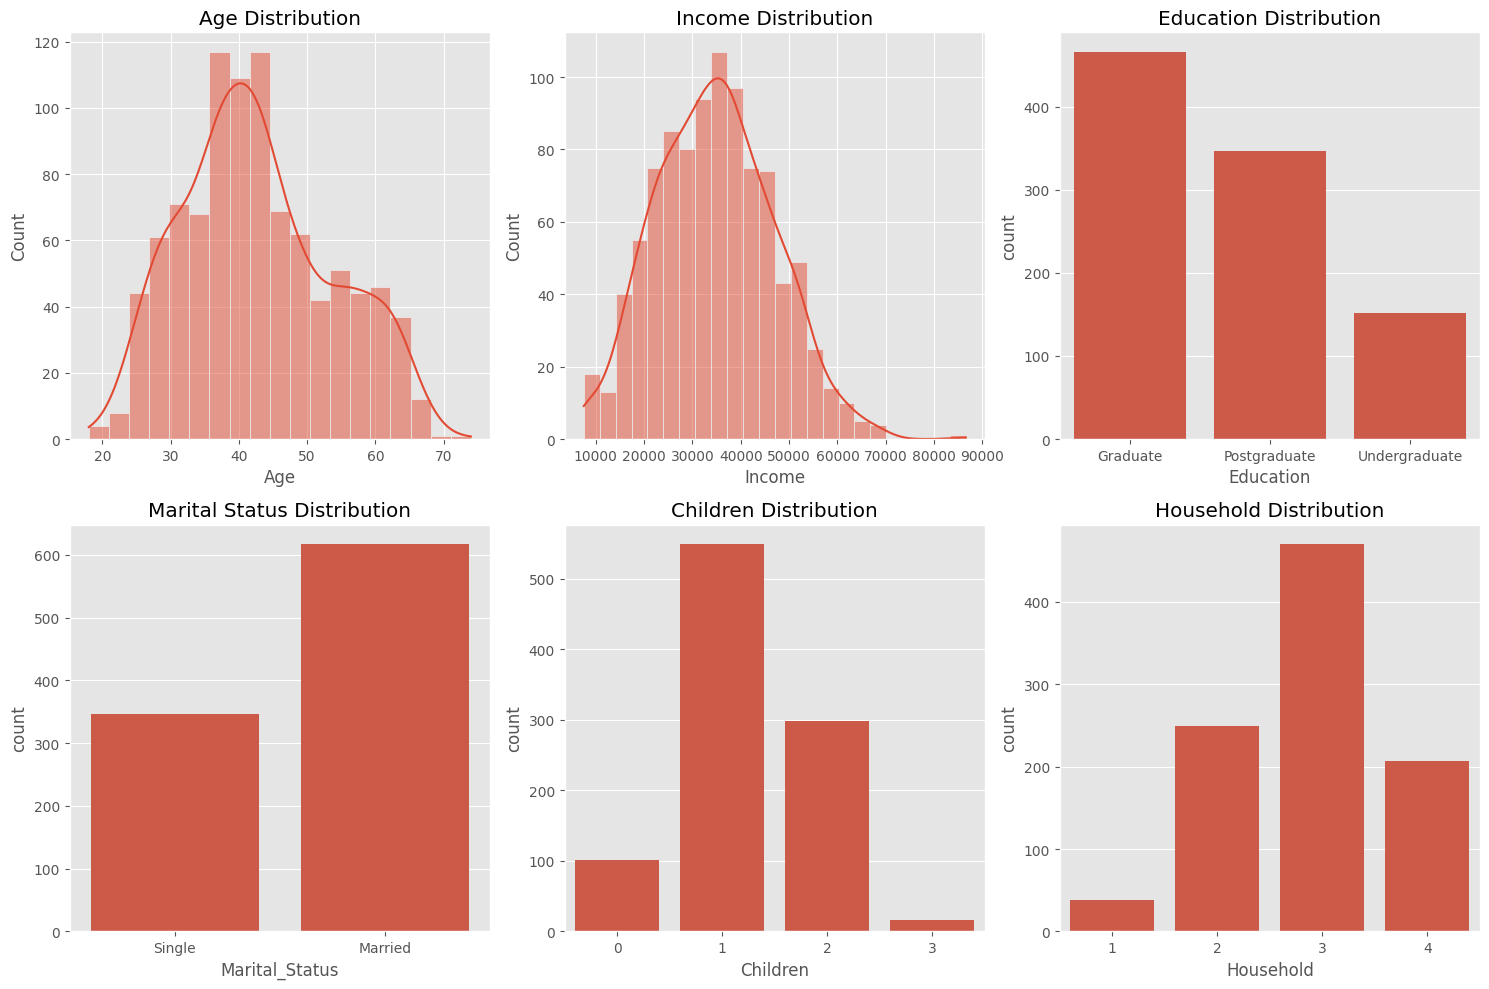

In [ ]:
# prompt: Visualise the distribution of collumns : Age, Income, Education, Marital_Status, Children, Household

import matplotlib.pyplot as plt
# Visualize the distribution of columns: Age, Income, Education, Marital_Status, Children, Household
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Age distribution
sns.histplot(df2['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Income distribution
sns.histplot(df2['Income'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution')

# Education distribution
sns.countplot(x='Education', data=df2, ax=axes[0, 2])
axes[0, 2].set_title('Education Distribution')
axes[0, 2].tick_params(axis='x')

# Marital Status distribution
sns.countplot(x='Marital_Status', data=df2, ax=axes[1, 0])
axes[1, 0].set_title('Marital Status Distribution')

# Children distribution
sns.countplot(x='Children', data=df2, ax=axes[1, 1])
axes[1, 1].set_title('Children Distribution')

# Household distribution
sns.countplot(x='Household', data=df2, ax=axes[1, 2])
axes[1, 2].set_title('Household Distribution')

plt.tight_layout()
plt.show()


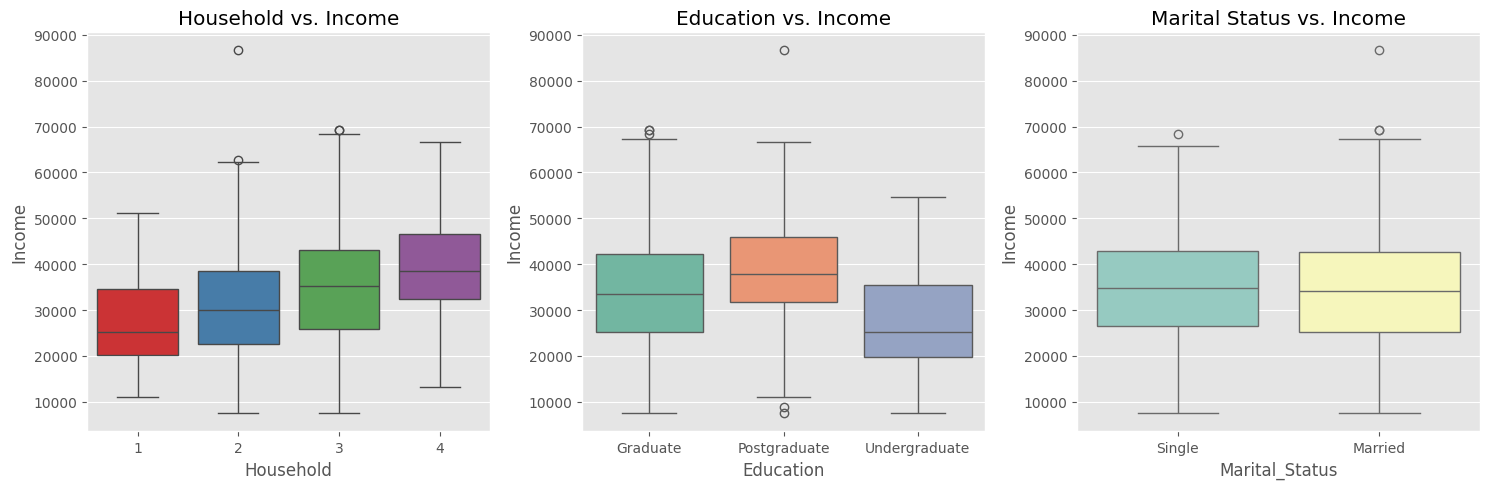

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

# Create boxplots with custom colors
sns.boxplot(data=df2, x='Household', y='Income', ax=ax0, palette='Set1')
ax0.set_title('Household vs. Income')

sns.boxplot(data=df2, x='Education', y='Income', ax=ax1, palette='Set2')
ax1.set_title('Education vs. Income')

sns.boxplot(data=df2, x='Marital_Status', y='Income', ax=ax2, palette='Set3')
ax2.set_title('Marital Status vs. Income')

plt.tight_layout()
plt.show()

### Customer Behaviour

In [ ]:
#Calculate the total spend
df2['Total_Spend'] = df2['Wines'] + df2['Fruits'] + df2['Meat'] + df2['Fish']\
+ df2['Sweet'] + df2['Gold']

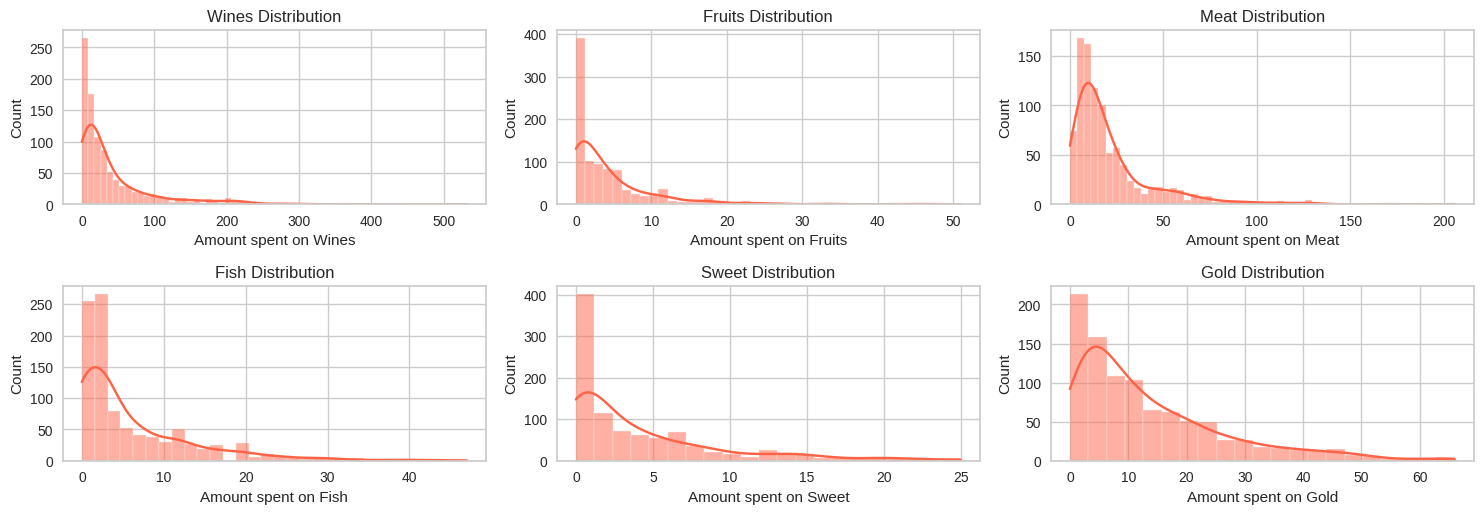

In [ ]:
# prompt: Visualise the distribution of collumns : 'MntWines', 'MntFruits', 'MntMeatProducts',  'NumDealsPurchases', 'MntFishProducts', 'MntSweetProducts',
#        'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency'

import matplotlib.pyplot as plt
# Visualize the distribution of columns
columns_to_visualize = ['Wines', 'Fruits', 'Meat',
                        'Fish', 'Sweet', 'Gold']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df2[column], kde=True, color = 'tomato')
    plt.title(column + ' Distribution')
    plt.xlabel('Amount spent on ' + column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


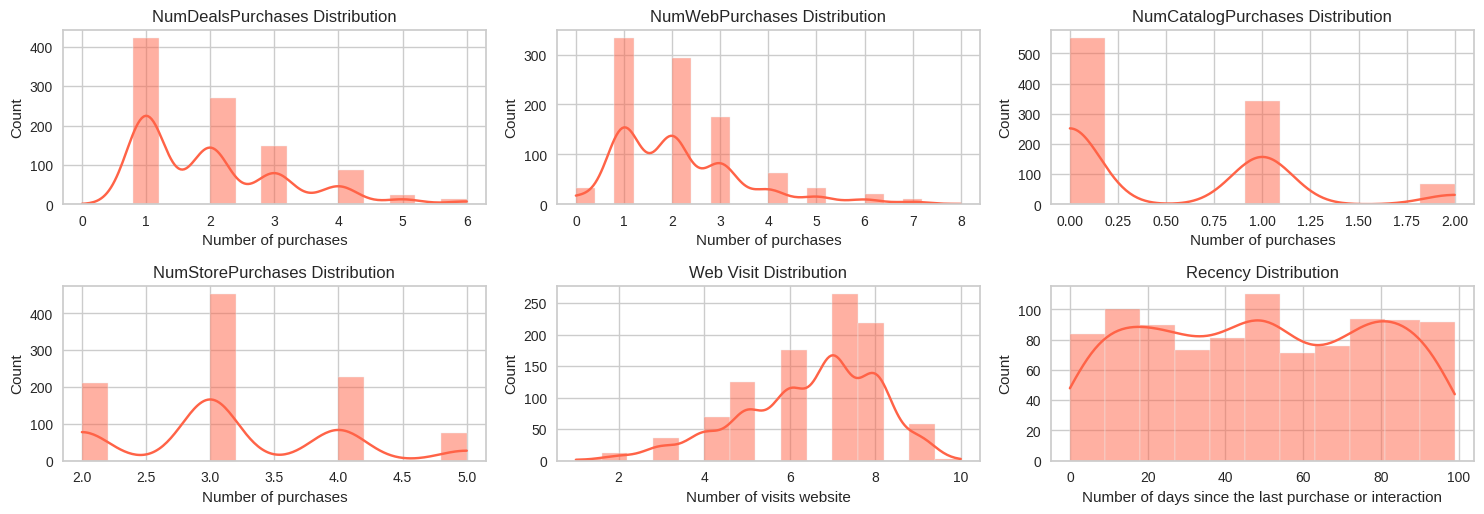

In [ ]:
columns_to_visualize = ['NumDealsPurchases',
                        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df2[column], kde=True, color = 'tomato')
    plt.title(column + ' Distribution')
    plt.xlabel('Number of purchases')
    plt.ylabel('Count')

plt.subplot(4, 3, 5)
sns.histplot(df2.NumWebVisitsMonth, kde=True, color = 'tomato')
plt.title('Web Visit Distribution')
plt.xlabel('Number of visits website')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(4, 3, 6)
sns.histplot(df2.Recency, kde=True, color = 'tomato')
plt.title('Recency Distribution')
plt.xlabel('Number of days since the last purchase or interaction')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Spending according to Education

In [ ]:
#Total Spend accross different eduaction level
# px.bar(df2.groupby('Education')['Total_Spend'].sum().reset_index(),
#        x='Education', y='Total_Spend', text_auto=True, color='Education',
#       title='Total spent accross different eduaction')

from plotly.subplots import make_subplots

df_sum = df2.groupby('Education')['Total_Spend'].sum().reset_index()
df_mean = df2.groupby('Education')['Total_Spend'].mean().reset_index()

df_mean['Total_Spend'] = df_mean['Total_Spend'].round(2)

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Total Spend", "Average Spend"))
category_colors = ['royalblue', 'tomato', 'mediumspringgreen', 'violet']
# Add the first bar chart for total spend
fig.add_trace(
    go.Bar(
        x=df_sum['Education'],
        y=df_sum['Total_Spend'],
        text=df_sum['Total_Spend'],
        textposition='auto',
        name='Total Spend',
        marker_color=category_colors
    ),
    row=1,
    col=1
)

# Add the second bar chart for average spend
fig.add_trace(
    go.Bar(
        x=df_mean['Education'],
        y=df_mean['Total_Spend'],
        text=df_mean['Total_Spend'],
        textposition='auto',
        name='Average Spend',
        marker_color=category_colors
    ),
    row=1,
    col=2
)

# Update layout for a better presentation
fig.update_layout(
    title_text="Total and Average Spend by Education",  # Main title for the subplot
    width=1500,
    height=800
)

fig.show()

In [ ]:
#Avg Total Spend accross different eduaction level
px.bar(df2.groupby('Education')['Total_Spend'].mean().reset_index(),
       x='Education', y='Total_Spend', text_auto=True, color='Education',
      title='Avg spent accross different eduaction')

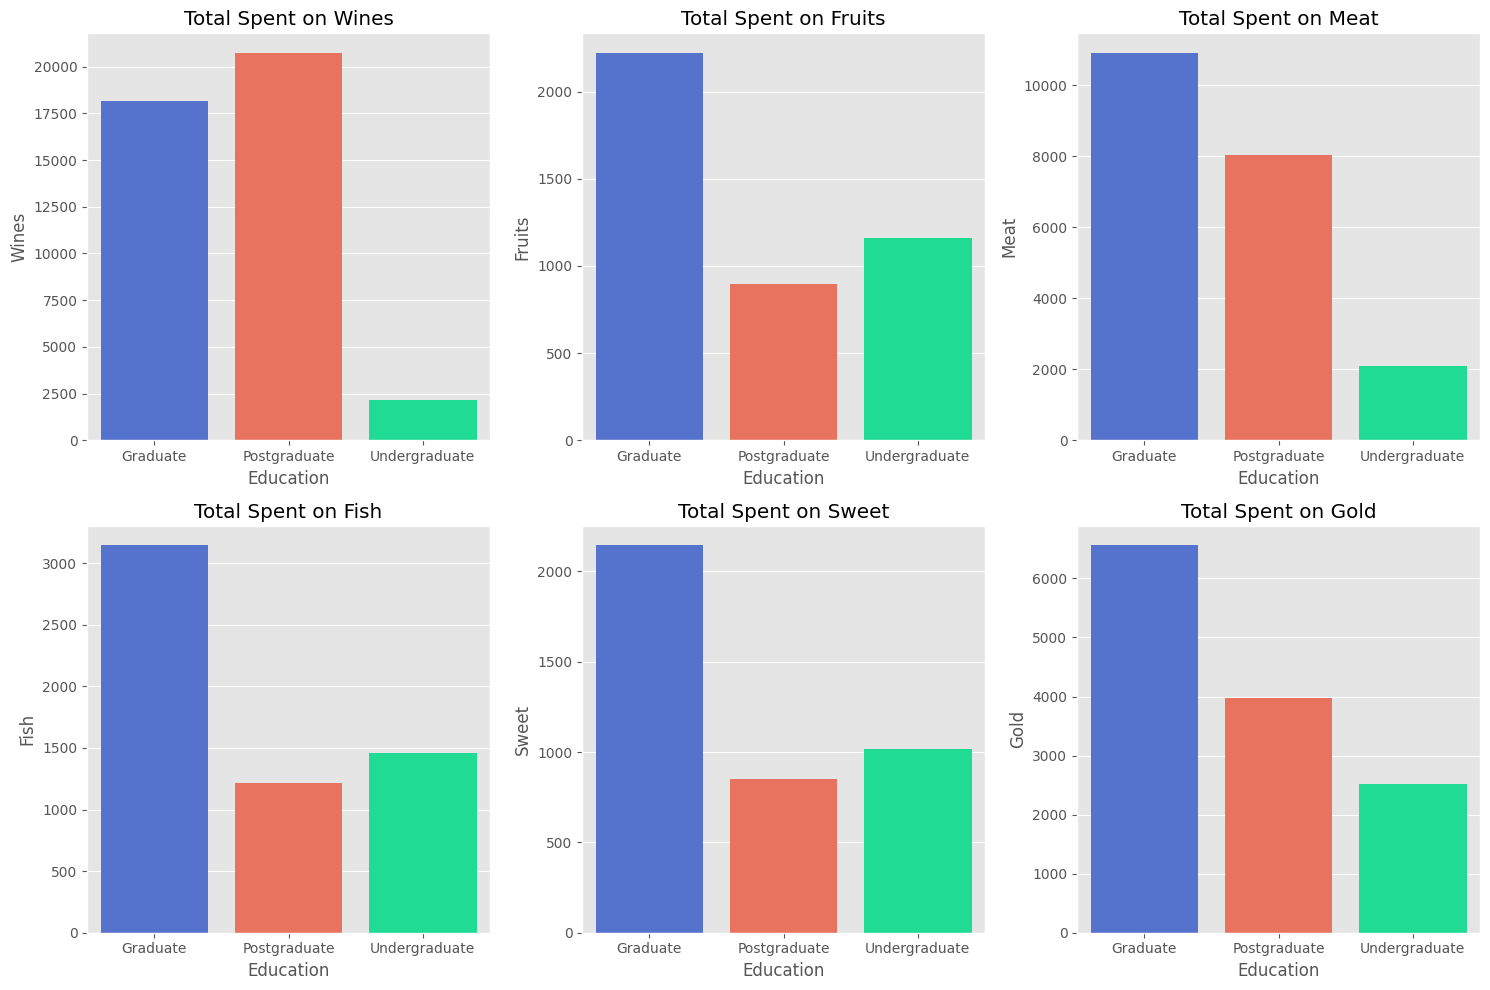

In [ ]:
# Define custom colors for each spending category
category_colors = ['royalblue', 'tomato', 'mediumspringgreen', 'violet']

# Category on money spend
money_spend = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']

# Group by education level and calculate average spending
data = df2.groupby('Education')[money_spend].sum().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Plot each spending category with a different color
for i, col in enumerate(money_spend):
    sns.barplot(data=data, x='Education', y=col, ax=axs[i], palette=category_colors)
    axs[i].set_title(f'Total Spent on {col}')

plt.tight_layout()
plt.show()

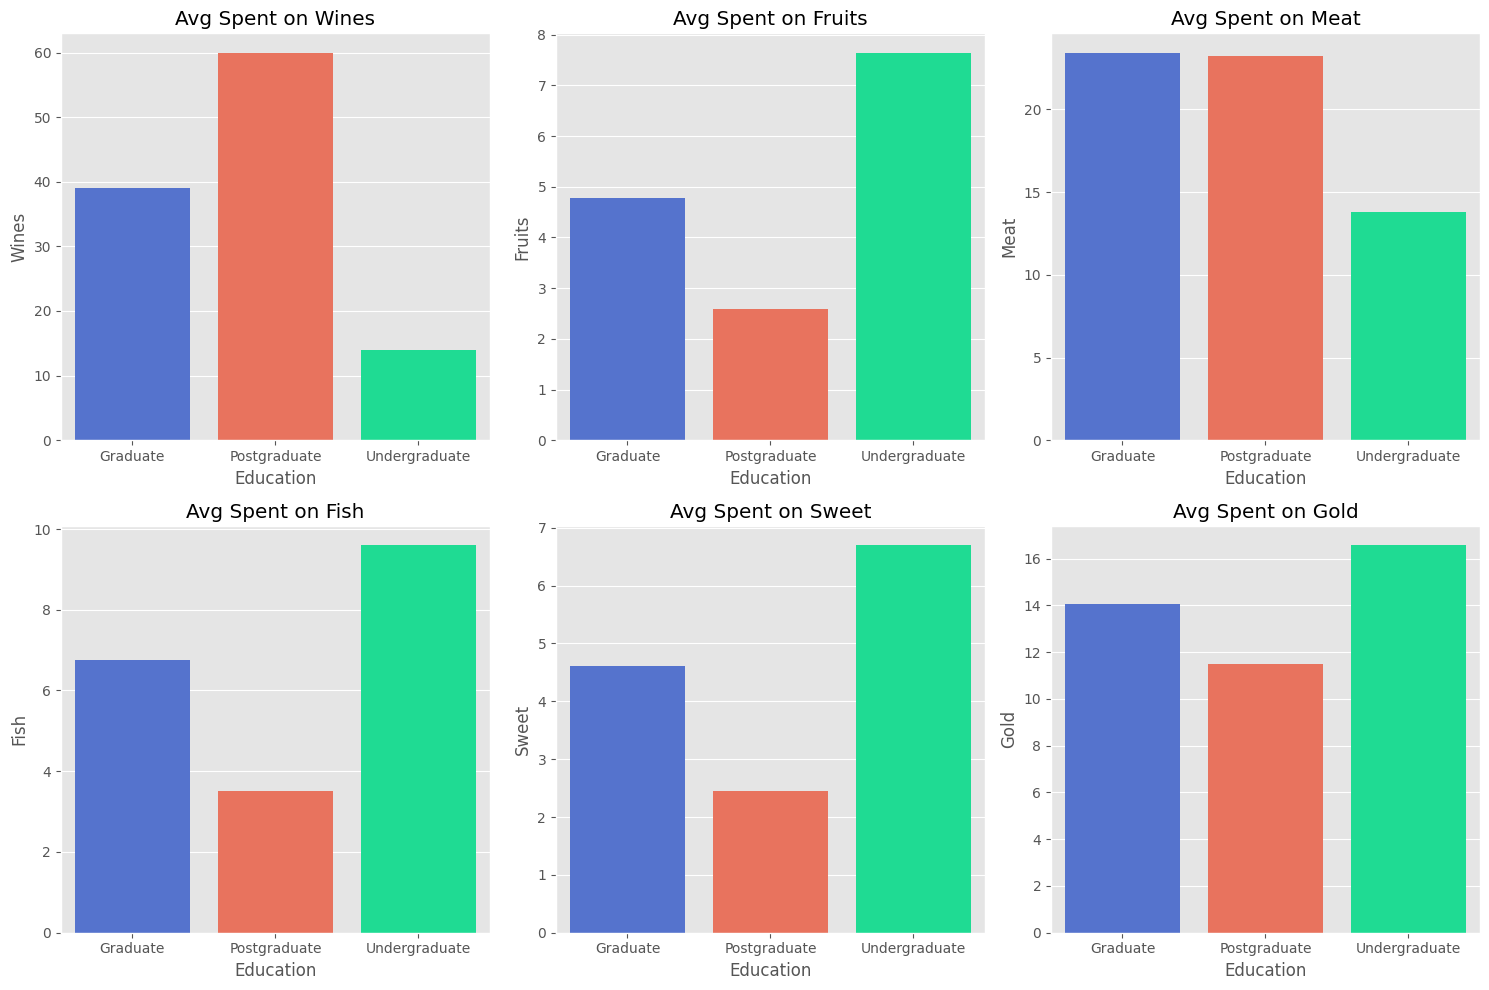

In [ ]:
category_colors = ['royalblue', 'tomato', 'mediumspringgreen']

# Category on money spend
money_spend = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']

# Group by education level and calculate average spending
data = df2.groupby('Education')[money_spend].mean().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Plot each spending category with a different color
for i, col in enumerate(money_spend):
    sns.barplot(data=data, x='Education', y=col, ax=axs[i], palette=category_colors)
    axs[i].set_title(f'Avg Spent on {col}')

plt.tight_layout()
plt.show()

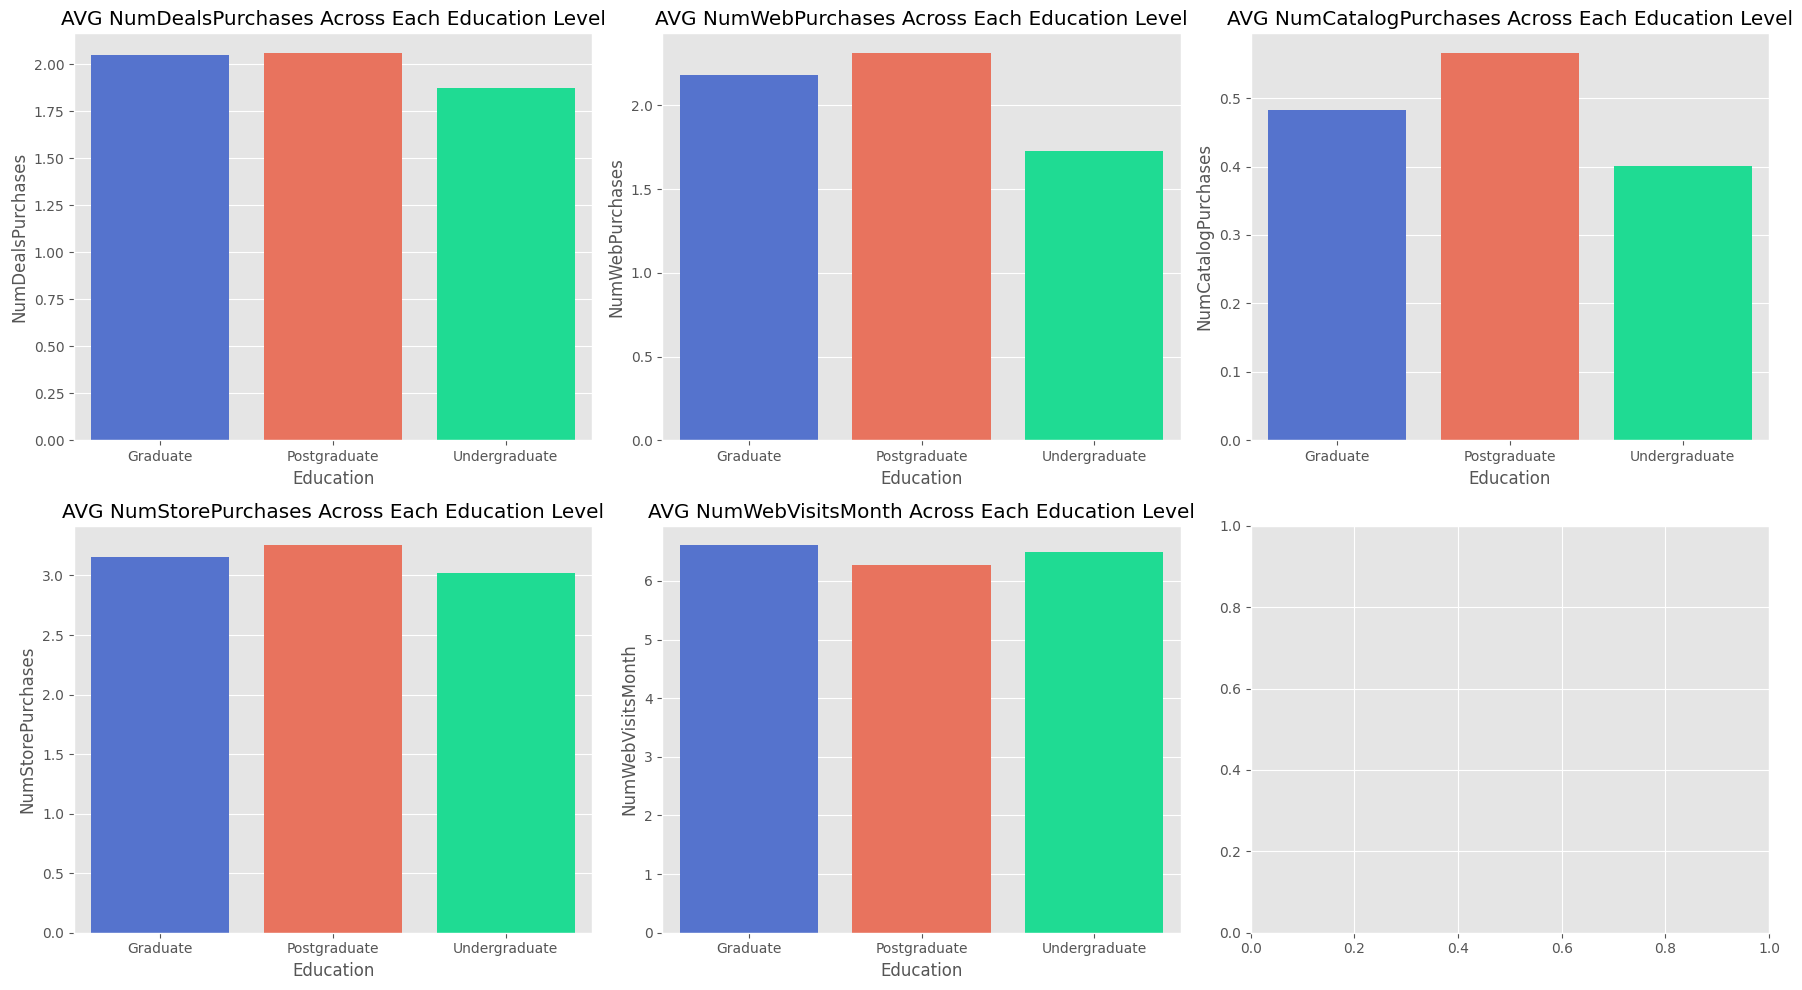

In [ ]:
#Avg number of purchases on different platforms accross each education level
purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
             'NumStorePurchases', 'NumWebVisitsMonth']

data = df2.groupby('Education')[purchases].mean().reset_index()


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, col in enumerate(purchases):
    sns.barplot(data=data, x='Education', y=col, ax = axs[i], palette=category_colors)
    axs[i].set_title(f'AVG {col} Across Each Education Level')

plt.tight_layout()
plt.show()

### Spending according to Marital status

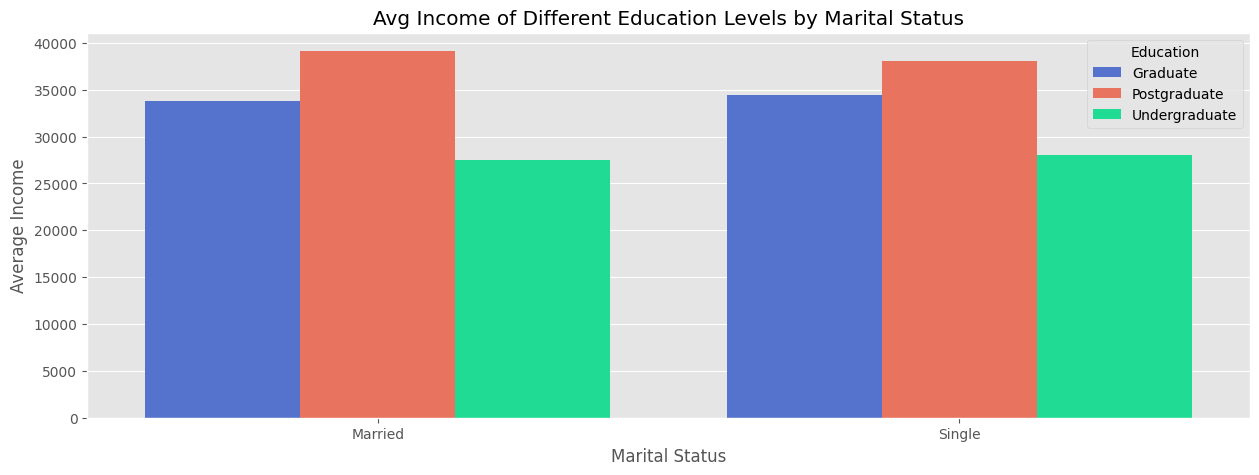

In [ ]:
# Group by marital status and education level, calculate average income
df_grouped = df2.groupby(['Marital_Status', 'Education'])['Income'].mean().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(15, 5))
sns.barplot(data=df_grouped, x='Marital_Status', y='Income', hue='Education',palette=category_colors)
plt.title('Avg Income of Different Education Levels by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.legend(title='Education', loc='upper right')

plt.show()


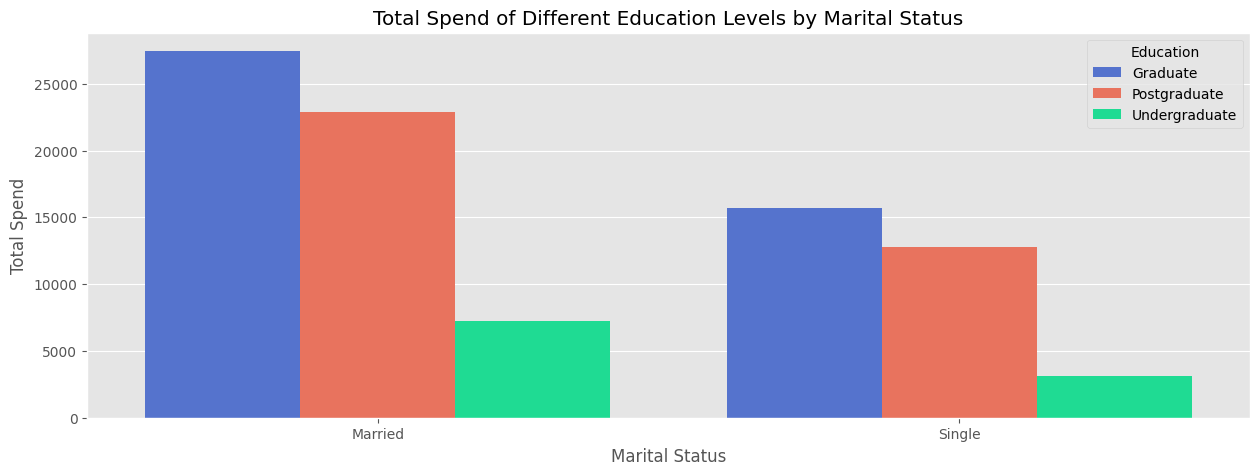

In [ ]:
# Group by marital status and education level, calculate total spend
df_grouped = df2.groupby(['Marital_Status', 'Education'])['Total_Spend'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(15, 5))
sns.barplot(data=df_grouped, x='Marital_Status', y='Total_Spend', hue='Education', palette=category_colors)
plt.title('Total Spend of Different Education Levels by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spend')
plt.legend(title='Education', loc='upper right')

plt.show()

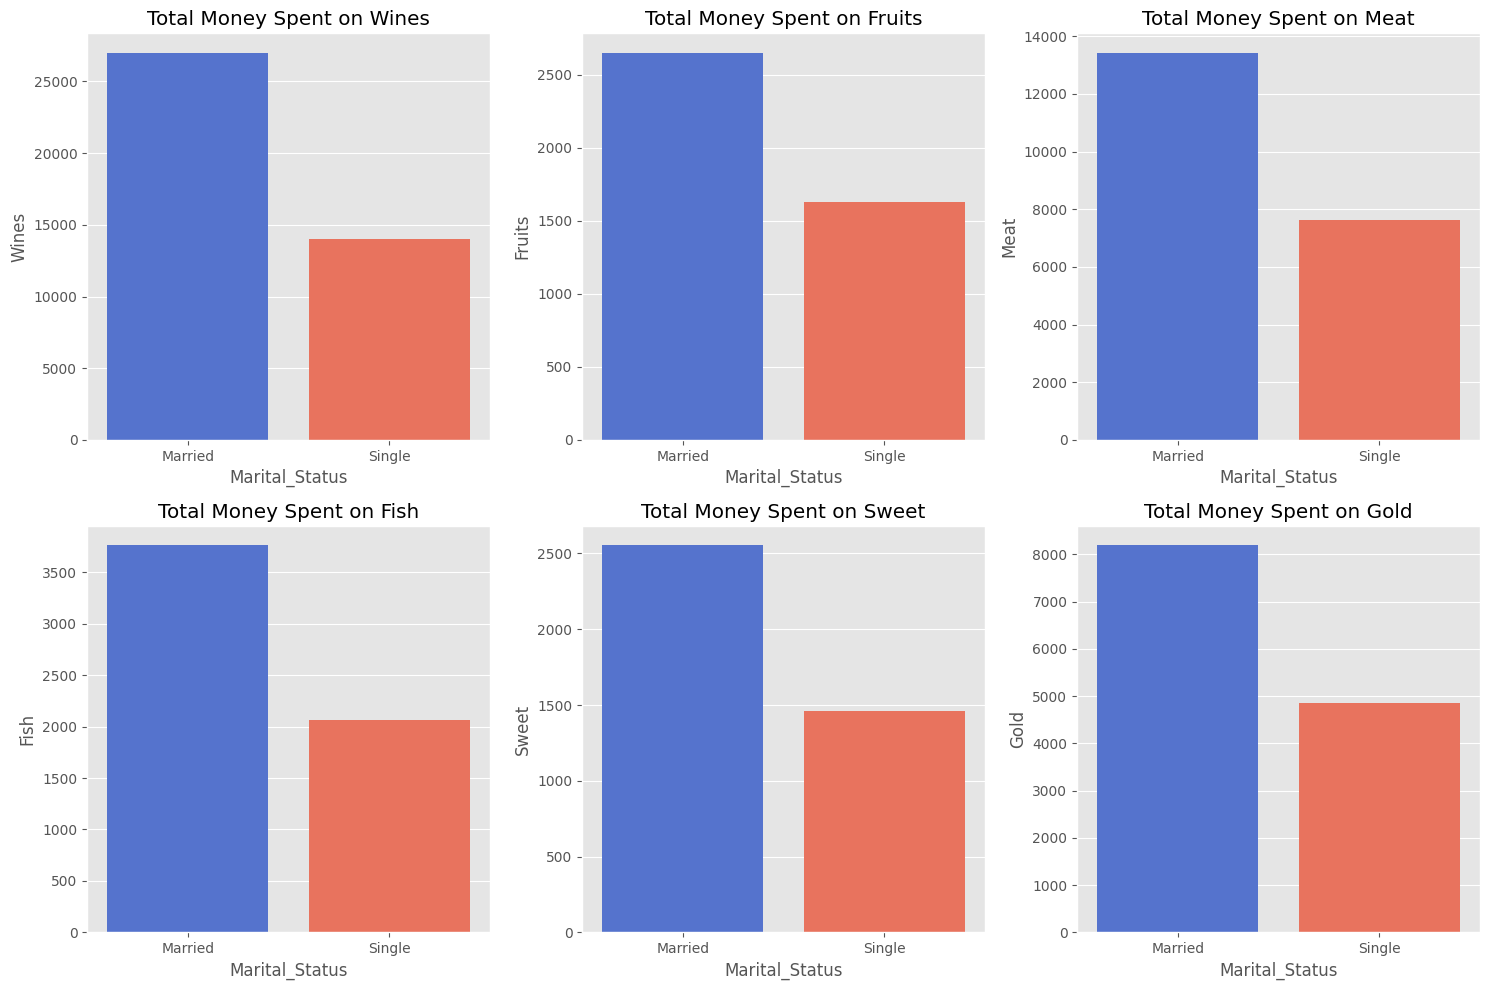

In [ ]:
# Group by married level and calculate average spending
data = df2.groupby('Marital_Status')[money_spend].sum().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Plot each spending category with a different color
for i, col in enumerate(money_spend):
    sns.barplot(data=data, x='Marital_Status', y=col, ax=axs[i], palette=category_colors)
    axs[i].set_title(f'Total Money Spent on {col}')

plt.tight_layout()
plt.show()

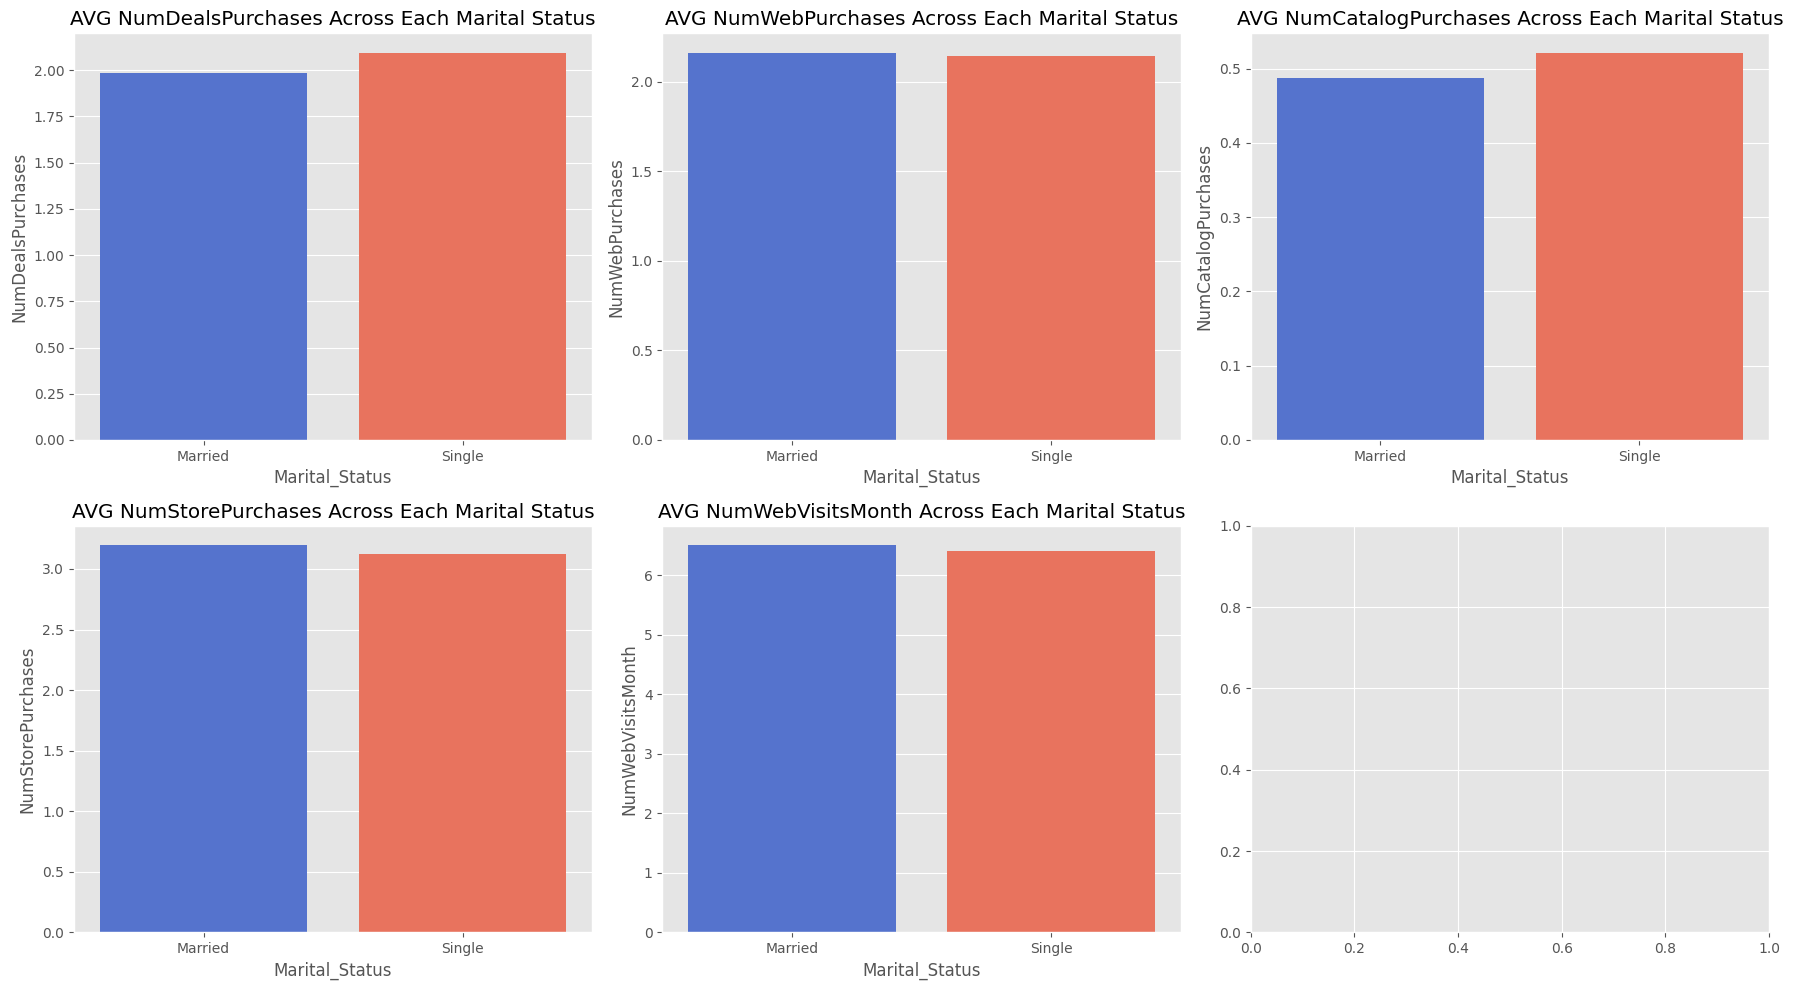

In [ ]:
#Avg number of purchases on different platforms accross each Marital_status

data = df2.groupby('Marital_Status')[purchases].mean().reset_index()


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, col in enumerate(purchases):
    sns.barplot(data=data, x='Marital_Status', y=col, ax = axs[i], palette=category_colors)
    axs[i].set_title(f'AVG {col} Across Each Marital Status')

plt.tight_layout()
plt.show()

### Spending according to Household

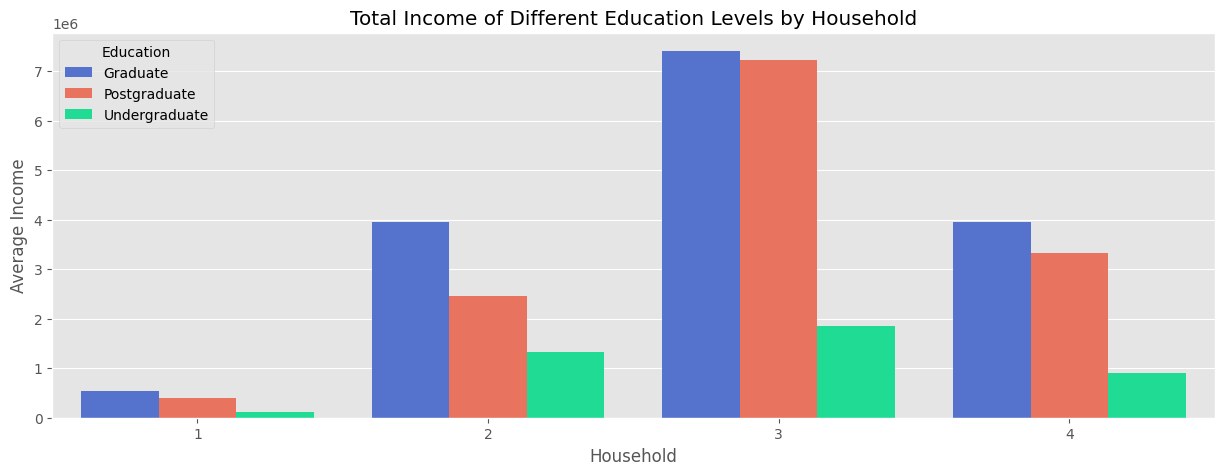

In [ ]:
import matplotlib.pyplot as plt
# Group by Household and education level, calculate total income
df_grouped = df2.groupby(['Household', 'Education'])['Income'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(15, 5))
sns.barplot(data=df_grouped, x='Household', y='Income', hue='Education',palette=category_colors)
plt.title('Total Income of Different Education Levels by Household')
plt.xlabel('Household')
plt.ylabel('Average Income')
plt.legend(title='Education', loc='upper left')

plt.show()

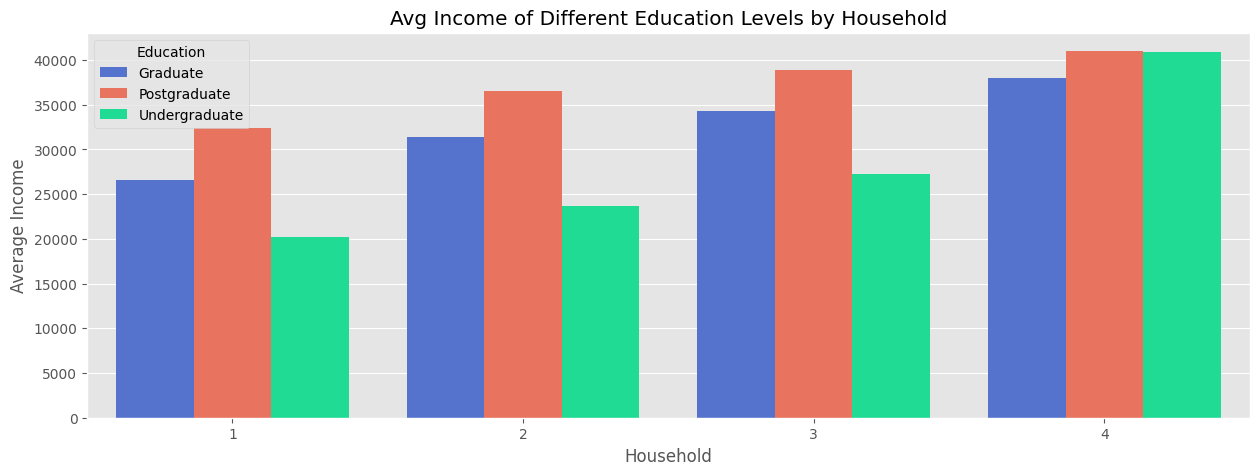

In [ ]:
# prompt: Visualise the Group by Household and education level, calculate average income

import matplotlib.pyplot as plt
# Group by Household and education level, calculate average income
df_grouped = df2.groupby(['Household', 'Education'])['Income'].mean().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(15, 5))
sns.barplot(data=df_grouped, x='Household', y='Income', hue='Education',palette=category_colors)
plt.title('Avg Income of Different Education Levels by Household')
plt.xlabel('Household')
plt.ylabel('Average Income')
plt.legend(title='Education', loc='upper left')

plt.show()


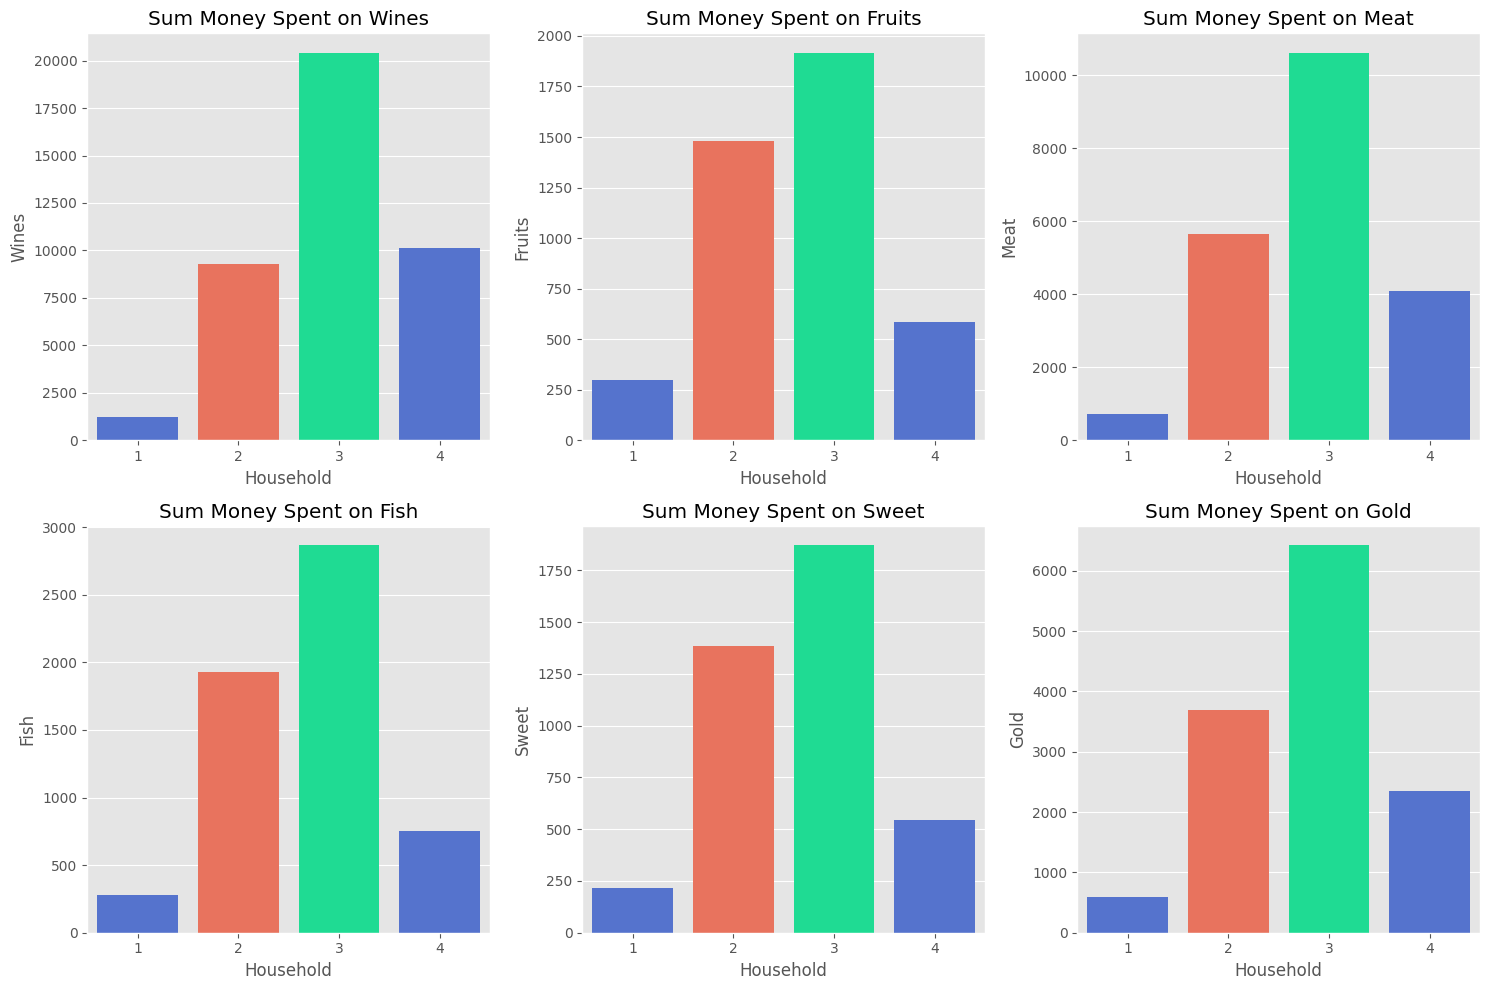

In [ ]:
# Group by household and calculate total spending
data = df2.groupby('Household')[money_spend].sum().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Plot each spending category with a different color
for i, col in enumerate(money_spend):
    sns.barplot(data=data, x='Household', y=col, ax=axs[i], palette=category_colors)
    axs[i].set_title(f'Sum Money Spent on {col}')

plt.tight_layout()
plt.show()

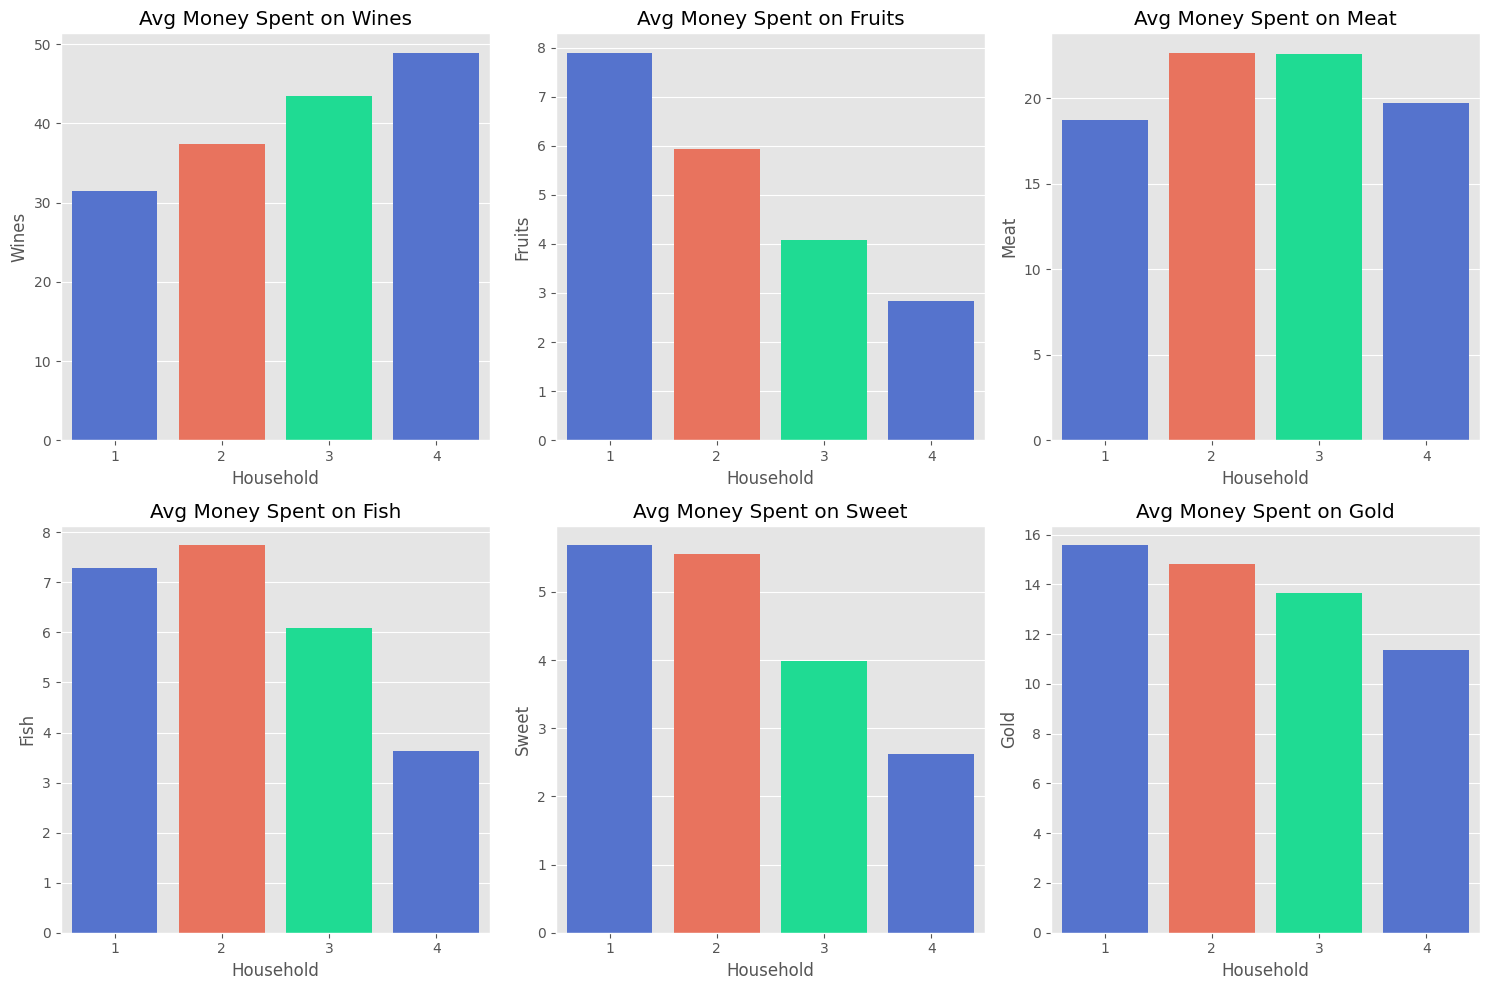

In [ ]:
# Group by household and calculate average spending
data = df2.groupby('Household')[money_spend].mean().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Plot each spending category with a different color
for i, col in enumerate(money_spend):
    sns.barplot(data=data, x='Household', y=col, ax=axs[i], palette=category_colors)
    axs[i].set_title(f'Avg Money Spent on {col}')

plt.tight_layout()
plt.show()

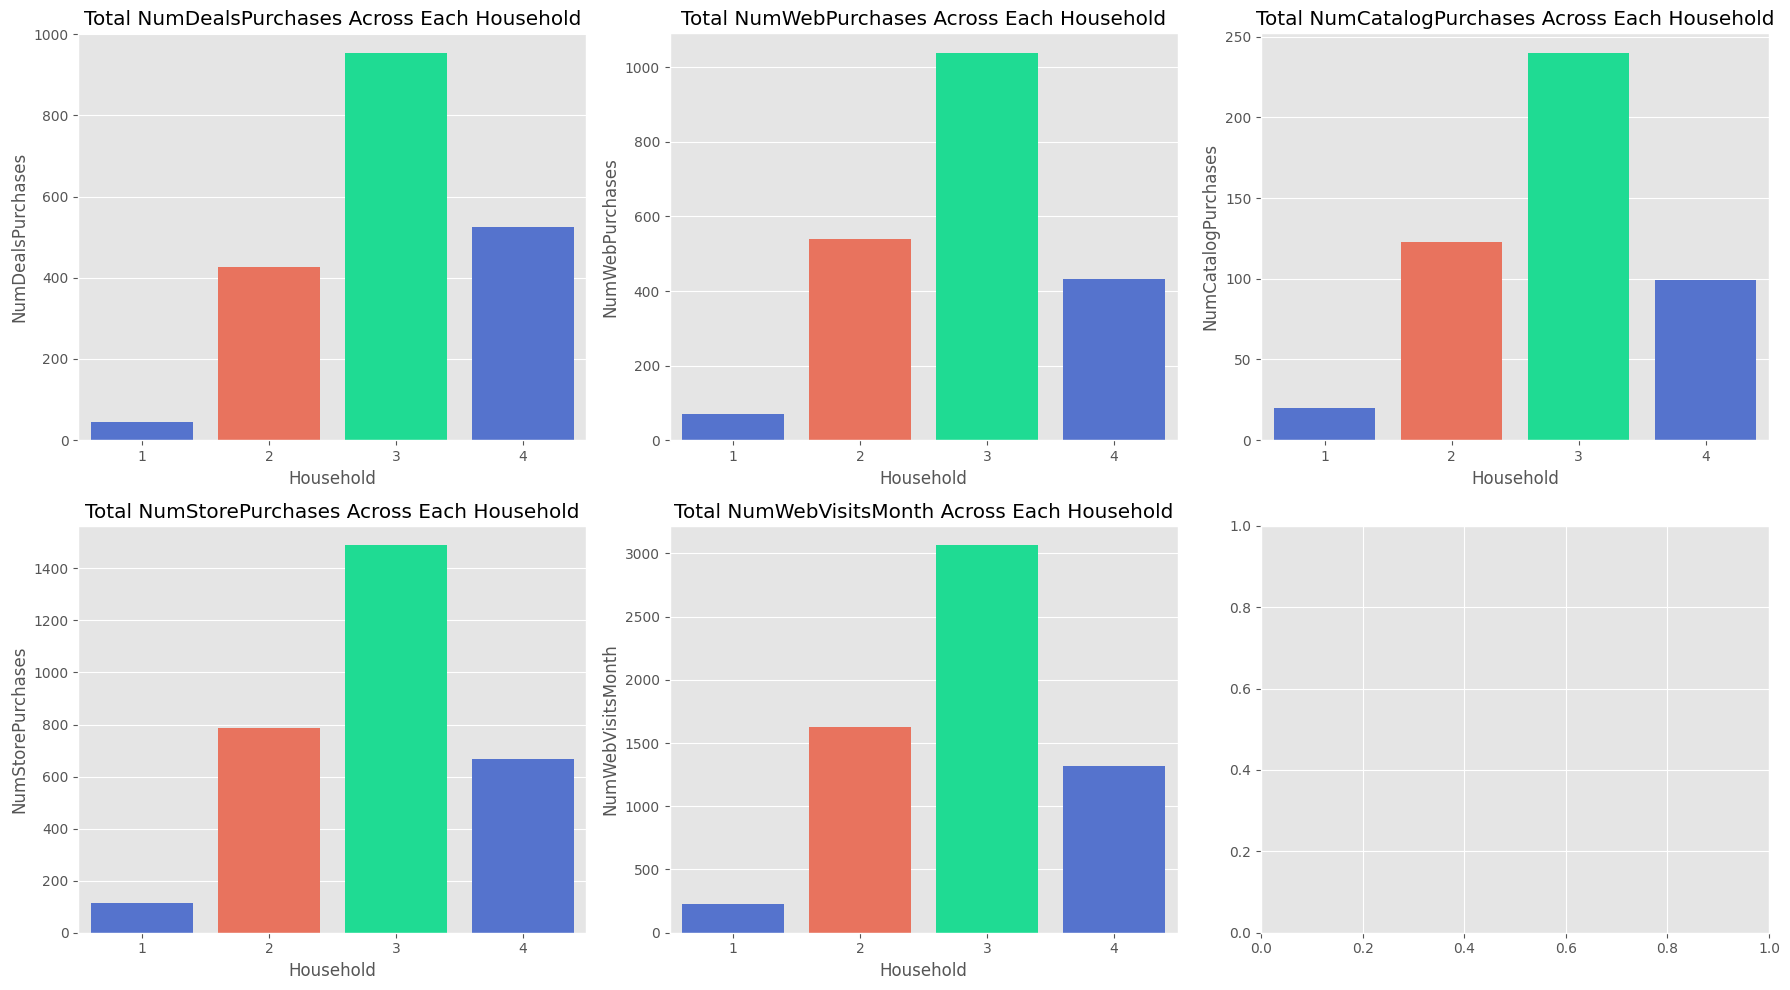

In [ ]:
#Total number of purchases on different platforms accross each Household

data = df2.groupby('Household')[purchases].sum().reset_index()


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, col in enumerate(purchases):
    sns.barplot(data=data, x='Household', y=col, ax = axs[i], palette=category_colors)
    axs[i].set_title(f'Total {col} Across Each Household')

plt.tight_layout()
plt.show()

## Model

### Demographic characteristics

In [ ]:
df2.head()

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,People,Household,Total_Spend
1,2174,Graduate,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,60,2,1,3,27
3,6182,Graduate,Married,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,30,1,2,3,53
7,6177,Postgraduate,Married,33454.0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,29,1,2,3,169
8,4855,Postgraduate,Married,30351.0,19,14,0,24,3,3,2,1,3,0,2,9,0,1,40,1,2,3,46
10,1994,Graduate,Married,51381.5,11,5,5,6,0,2,1,1,1,0,2,7,0,0,31,1,2,3,19


In [ ]:
round(df2.describe())

,ID,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Household,Total_Spend
count,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0,964.0
mean,5576.0,34708.0,49.0,43.0,4.0,22.0,6.0,4.0,14.0,2.0,2.0,0.0,3.0,6.0,0.0,0.0,43.0,1.0,3.0,93.0
std,3247.0,12140.0,29.0,58.0,6.0,23.0,7.0,5.0,13.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,11.0,1.0,1.0,85.0
min,9.0,7500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,18.0,0.0,1.0,9.0
25%,2722.0,25910.0,24.0,8.0,0.0,7.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,5.0,0.0,0.0,35.0,1.0,2.0,38.0
50%,5424.0,34478.0,49.0,20.0,2.0,14.0,3.0,2.0,10.0,2.0,2.0,0.0,3.0,7.0,0.0,0.0,42.0,1.0,3.0,62.0
75%,8370.0,42795.0,76.0,51.0,6.0,26.0,8.0,6.0,20.0,3.0,3.0,1.0,4.0,8.0,0.0,0.0,50.0,2.0,3.0,120.0
max,11191.0,86580.0,99.0,532.0,51.0,206.0,47.0,25.0,66.0,6.0,8.0,2.0,5.0,10.0,1.0,1.0,74.0,3.0,4.0,746.0


In [ ]:
# prompt: create df4 with collumns : Income, Age, Household

df4 = df2[['Income', 'Age', 'Household']]
df4.head()


,Income,Age,Household
1,46344.0,60,3
3,26646.0,30,3
7,33454.0,29,3
8,30351.0,40,3
10,51381.5,31,3


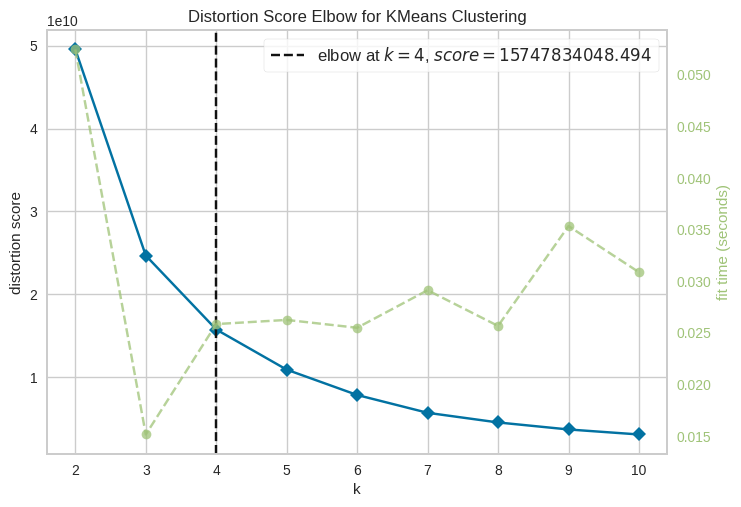

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

elbow_high_bal1 = KElbowVisualizer(KMeans(), k = 10)
elbow_high_bal1.fit(df4)
elbow_high_bal1.show()

In [ ]:
# prompt: build the GMM model for cluster and label with these features : Age,  Income, Household. Some features need to be normalized, identify and do it

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Choosing features for clustering
features = ['Age', 'Income', 'Household']
X = df4[features]

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Building the GMM model
n_components = 4  # You can adjust the number of clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_scaled)

# Predicting the clusters
labels = gmm.predict(X_scaled)

# Adding the cluster labels to the dataframe
df4['Cluster'] = labels

print(df4.head())


     Income  Age  Household  Cluster
1   46344.0   60          3        0
3   26646.0   30          3        0
7   33454.0   29          3        0
8   30351.0   40          3        0
10  51381.5   31          3        0


In [ ]:
df4['Cluster'].value_counts().sort_index()

,count
Cluster,
0,470
1,207
2,249
3,38


In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(df4, x='Income', y='Age', z='Household',
                    color='Cluster', opacity=0.7,
                    title='3D Visualization of Customer Segmentation')

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='Income',
        yaxis_title='Age',
        zaxis_title='Household'
    ),
    legend_title='Clusters',
    width=800,  # Adjust the width (in pixels)
    height=600  # Adjust the height (in pixels)
)

# Display the plot
fig.show()

In [ ]:
# prompt: show the df4 with collumns : Income, Age, Household with mean value and groupby 'Cluster'

round(df4[['Income', 'Age', 'Household']].groupby(df4['Cluster']).median())


,Income,Age,Household
Cluster,,,
0,35212.0,40.0,3.0
1,38452.0,48.0,4.0
2,30093.0,38.0,2.0
3,25323.0,40.0,1.0


### RFM

In [ ]:
# prompt: create collumn "Number_Purchase" in df2 is the sum of collumns : "NumDealsPurchases,  NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth"

df2['Number_Purchase'] = df2['NumDealsPurchases'] + df2['NumWebPurchases'] + df2['NumCatalogPurchases'] + df2['NumStorePurchases'] + df2['NumWebVisitsMonth']


In [ ]:
df2.head()

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,People,Household,Total_Spend,Number_Purchase
1,2174,Graduate,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,60,2,1,3,27,11
3,6182,Graduate,Married,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,30,1,2,3,53,14
7,6177,Postgraduate,Married,33454.0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,29,1,2,3,169,18
8,4855,Postgraduate,Married,30351.0,19,14,0,24,3,3,2,1,3,0,2,9,0,1,40,1,2,3,46,15
10,1994,Graduate,Married,51381.5,11,5,5,6,0,2,1,1,1,0,2,7,0,0,31,1,2,3,19,11


In [ ]:
# prompt: create dataframe df3 contains collumns : 'Recency, Total_Spend, Number_Purchase'

df3 = df2[['Recency', 'Number_Purchase','Total_Spend',]]
df3.head()


,Recency,Number_Purchase,Total_Spend
1,38,11,27
3,26,14,53
7,32,18,169
8,19,15,46
10,11,11,19


In [ ]:
# prompt: rename the collums : {Number_Purchase : Frequency, Total_Spend : Moneytary}

df3.rename(columns={'Number_Purchase': 'Frequency', 'Total_Spend': 'Monetary'}, inplace=True)
df3.head()


,Recency,Frequency,Monetary
1,38,11,27
3,26,14,53
7,32,18,169
8,19,15,46
10,11,11,19


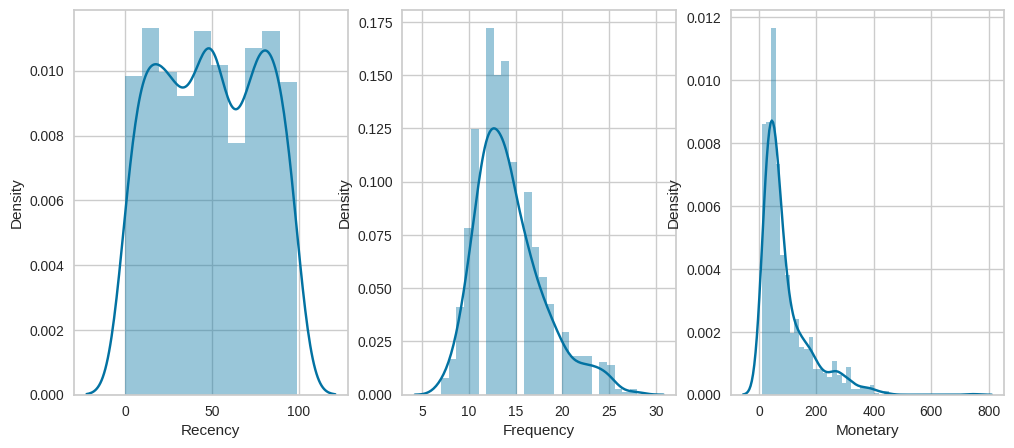

In [ ]:
# Visualize distribution to check

fig, ax = plt.subplots(1, 3, figsize=(12,5))
sns.distplot(df3['Recency'], ax = ax[0])
sns.distplot(df3['Frequency'], ax = ax[1])
sns.distplot(df3['Monetary'], ax = ax[2])
plt.show()

In [ ]:
# prompt: Using MinMaxScaler scale the df3 collumn value

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df3[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(df3[['Recency', 'Frequency', 'Monetary']])

# Display the scaled DataFrame
df3.head()


,Recency,Frequency,Monetary
1,0.383838,0.190476,0.024423
3,0.262626,0.333333,0.059701
7,0.323232,0.523810,0.217096
8,0.191919,0.380952,0.050204
10,0.111111,0.190476,0.013569


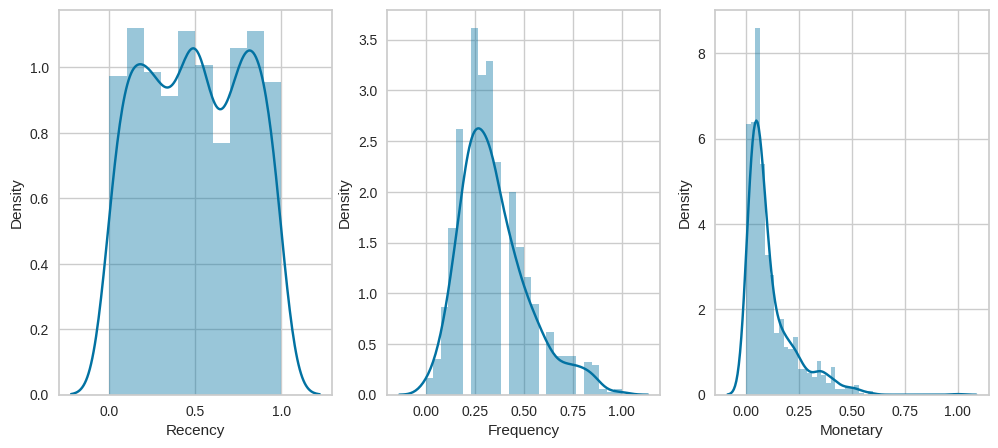

In [ ]:
# Visualize distribution after standardization

fig, ax = plt.subplots(1, 3, figsize=(12,5))
sns.distplot(df3['Recency'], ax = ax[0])
sns.distplot(df3['Frequency'], ax = ax[1])
sns.distplot(df3['Monetary'], ax = ax[2])
plt.show()

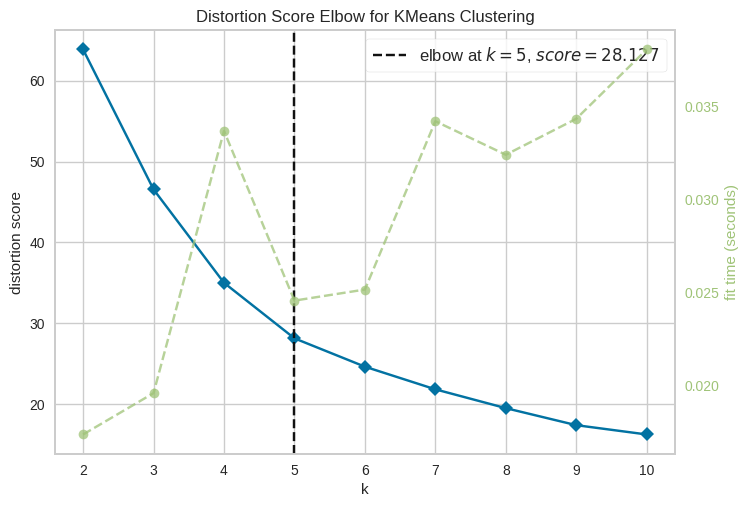

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# find k using Elbow and Silhouette
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

elbow_high_bal = KElbowVisualizer(KMeans(), k = 10)
elbow_high_bal.fit(df3)
elbow_high_bal.show()

In [ ]:
# create clusters
kmeans_high_elb = KMeans(n_clusters=5, random_state=42).fit(df3)
clusters_high_elb = kmeans_high_elb.labels_
df3['Clusters'] = clusters_high_elb
df3.head()

,Recency,Frequency,Monetary,Clusters
1,0.383838,0.190476,0.024423,4
3,0.262626,0.333333,0.059701,2
7,0.323232,0.523810,0.217096,1
8,0.191919,0.380952,0.050204,2
10,0.111111,0.190476,0.013569,2


In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(df3, x='Recency', y='Frequency', z='Monetary',
                    color='Clusters', opacity=0.7,
                    title='3D Visualization of Customer Segmentation')

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    legend_title='Clusters',
    width=800,  # Adjust the width (in pixels)
    height=600  # Adjust the height (in pixels)
)

# Display the plot
fig.show()

In [ ]:
# Total customers from each cluster
print(df3['Clusters'].value_counts().sort_index())

Clusters
0    270
1    121
2    233
3     74
4    266
Name: count, dtype: int64


In [ ]:
df3.groupby('Clusters').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(2)

,Recency,Frequency,Monetary
Clusters,,,
0,0.84,0.31,0.09
1,0.23,0.56,0.23
2,0.15,0.26,0.06
3,0.73,0.69,0.36
4,0.50,0.28,0.06


**Customer segmentation** :


***Group 0:***
Recency: This group has high Recency (0.84), meaning they have made purchases recently. This can make them the target of new promotional campaigns. Frequency: However, their purchasing frequency is low (0.31), so we need to find ways to motivate them to shop more often. Monetary: They spend little (0.09), so they can consider discounts or promotions to increase sales.

***Group 1:***
This group has low Recency (0.23), high purchase frequency (0.56) and average spending amount (0.23). These can be loyal and interested customers. We can focus on maintaining relationships with them.

***Group 2:***
This group has low Recency (0.15), low purchase frequency (0.26) and low spending amount (0.06). These may be potential customers who need promotions to stimulate shopping.

***Group 3:***
This group has high Recency (0.73), high purchase frequency (0.69) and quite large spending amount (0.36). These may be important customers, we need to maintain good relationships with them.

***Group 4:***
This group has medium Recency (0.50), low purchase frequency (0.28) and low spending amount (0.06). We can find ways to stimulate them to shop more often.